In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

Reading the csv file

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [3]:
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


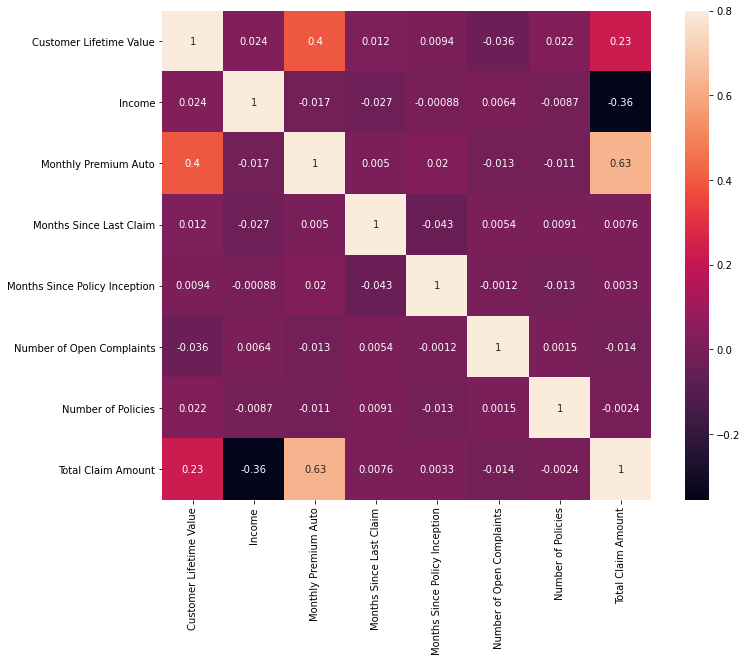

In [6]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

Customer Lifetime Value has high Correlation with Monthly Premium Auto.

In [7]:
num_list=['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']
num_list

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

Univariate Analysis for Numerical Data.

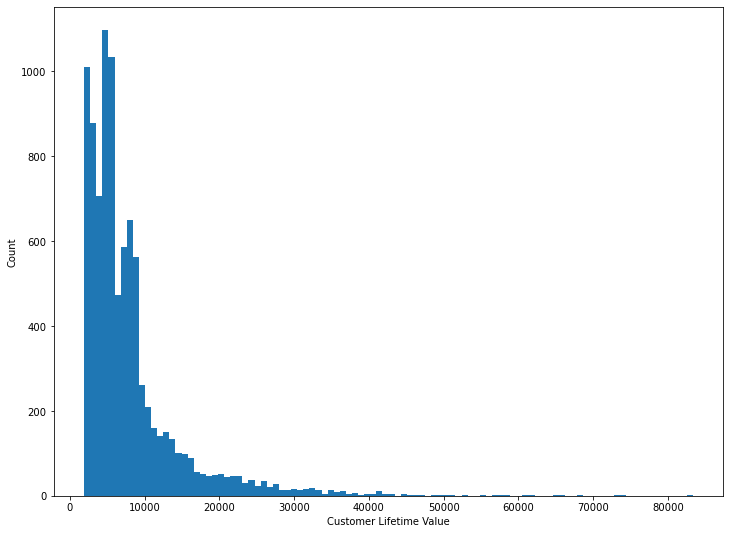

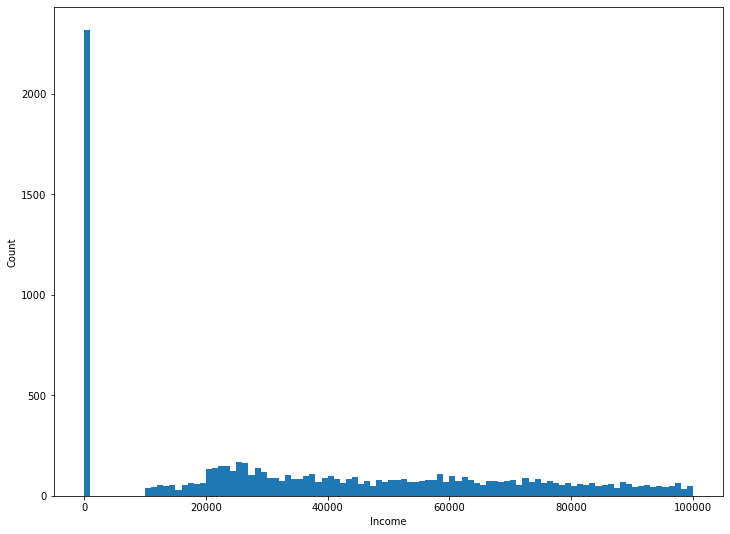

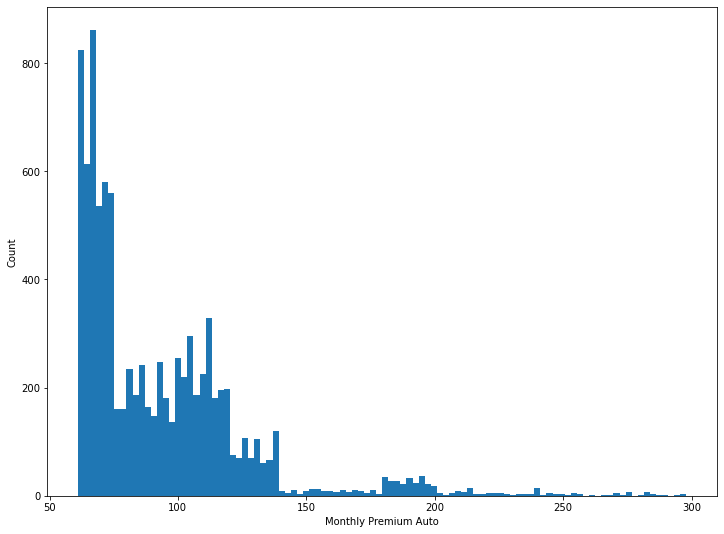

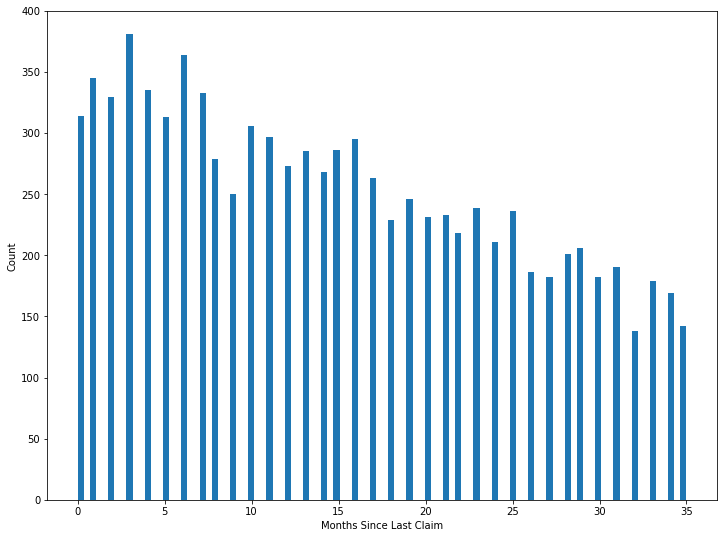

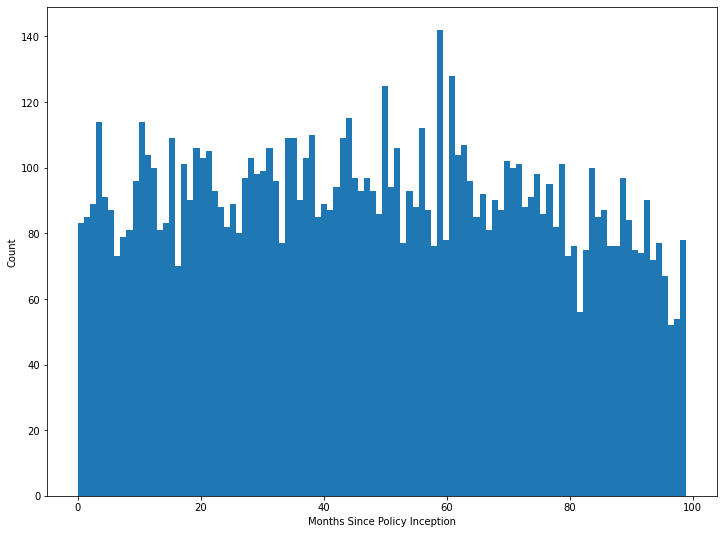

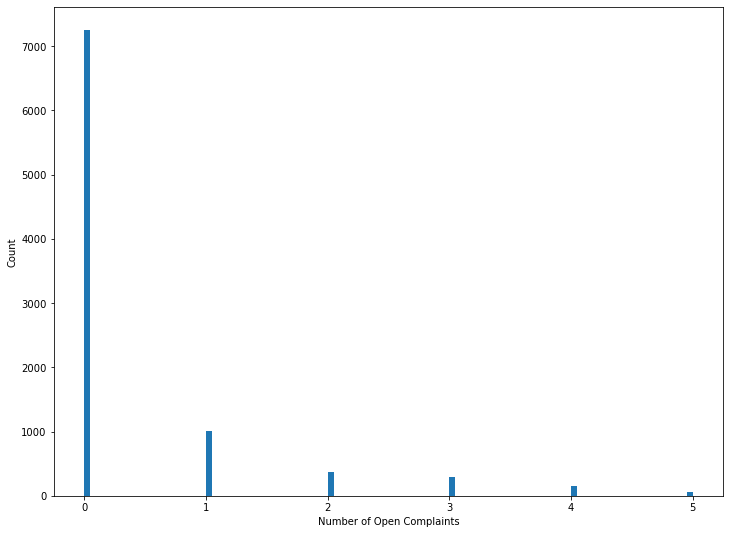

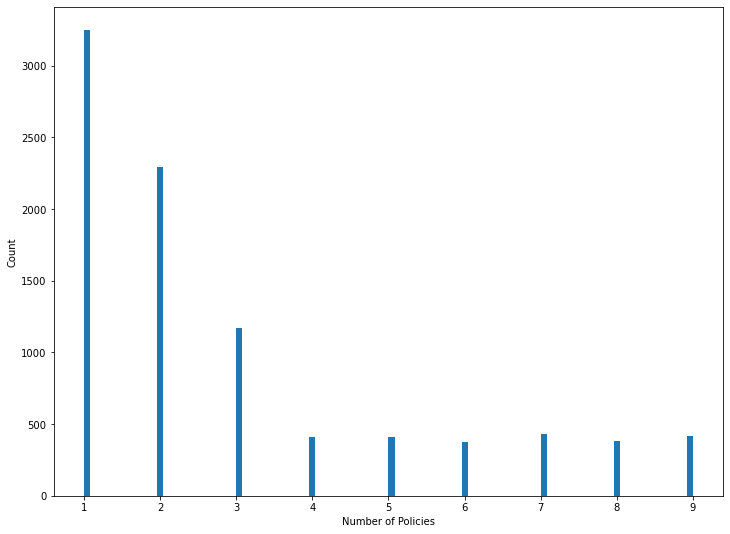

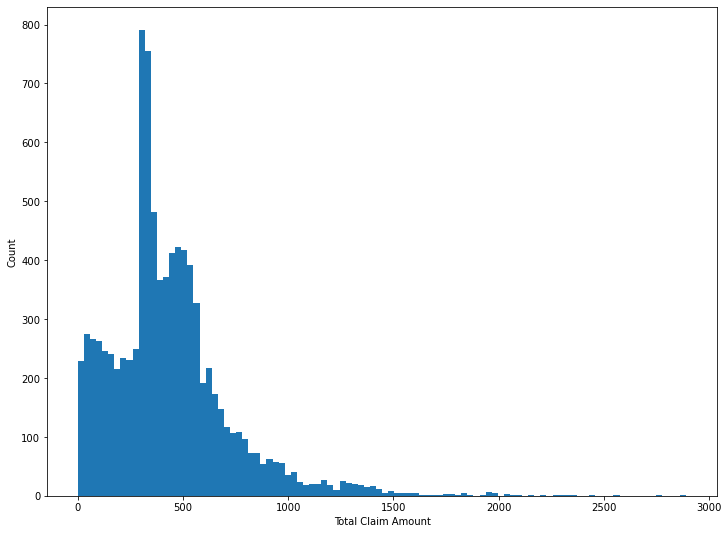

In [8]:
for i in num_list:
    plt.figure(figsize = (12, 9))
    plt.hist(df[i], bins = 100)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

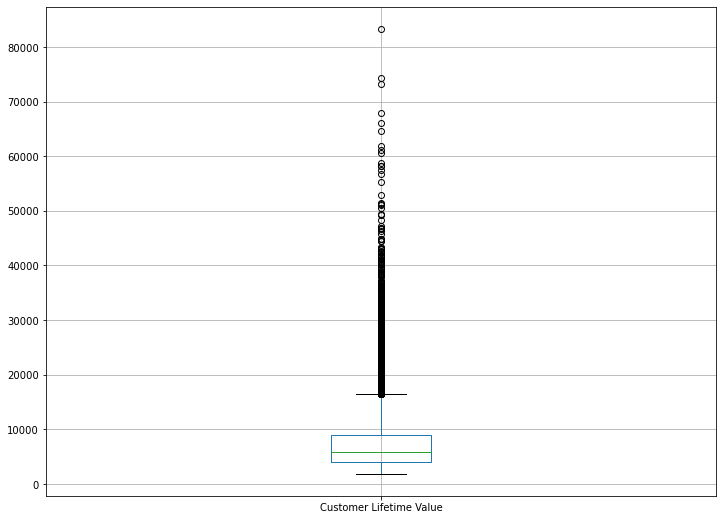

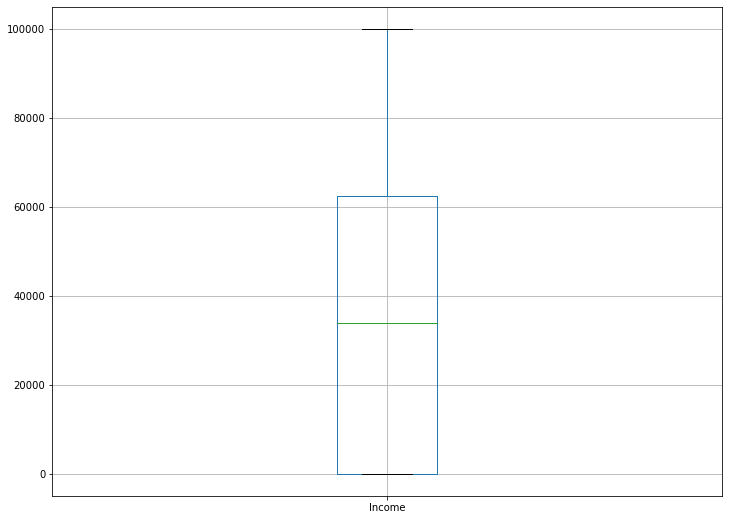

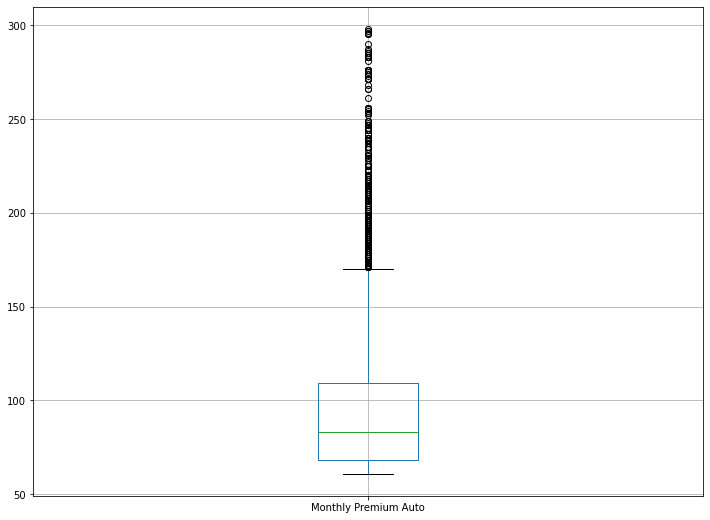

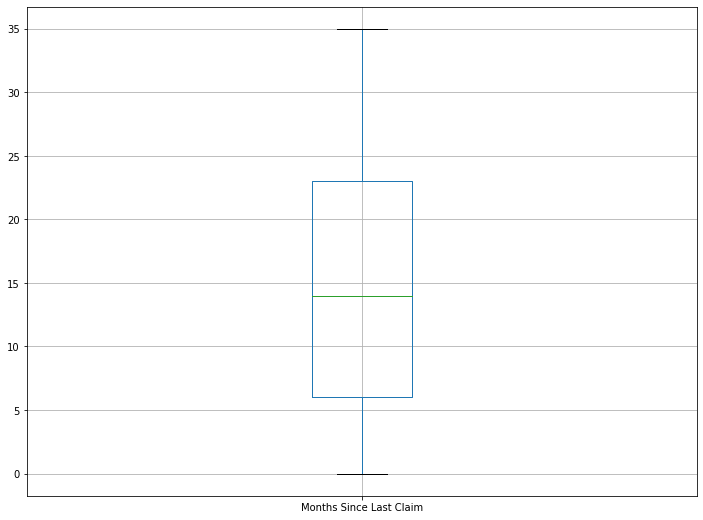

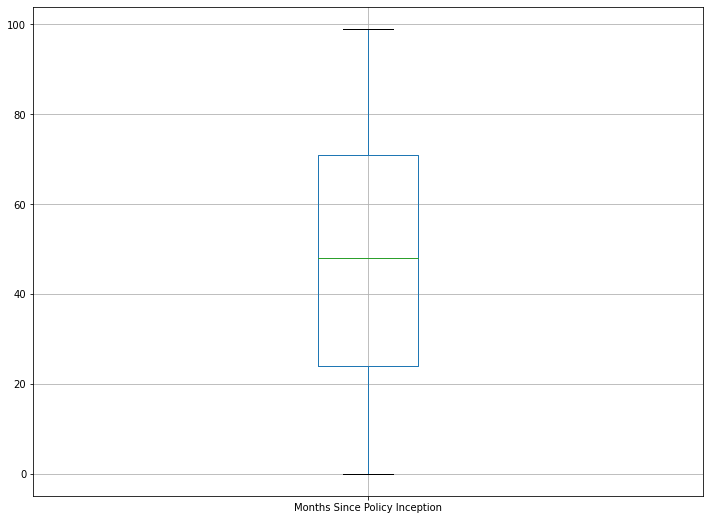

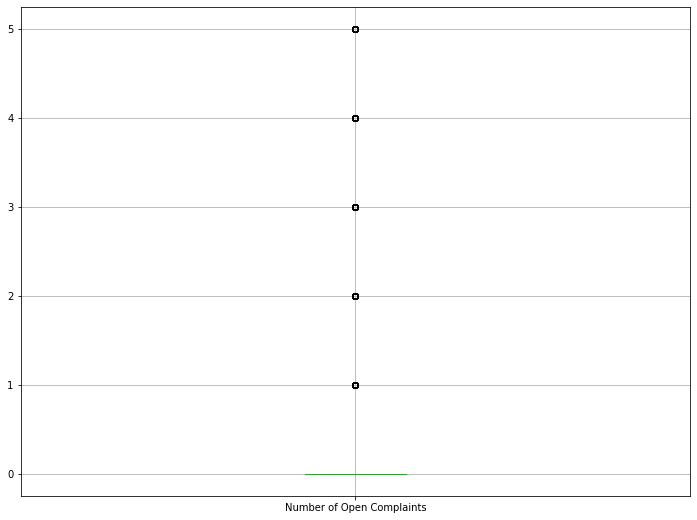

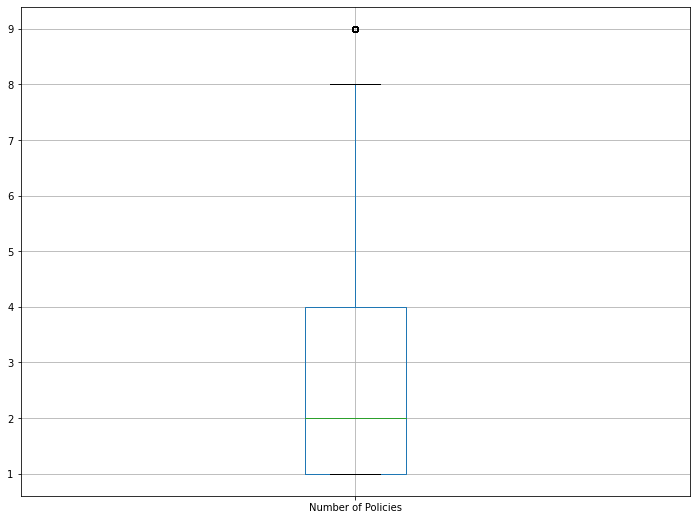

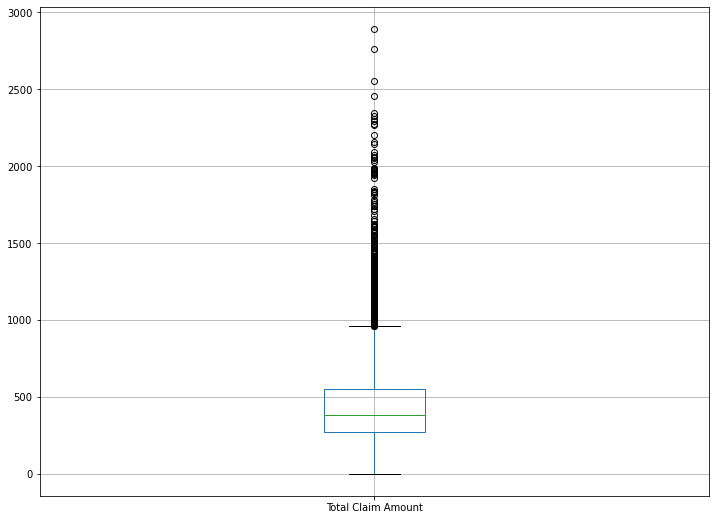

In [27]:
for i in num_list:
    plt.figure(figsize = (12, 9))
    df[i].plot.box(grid='True')

In [30]:
categorical_var=['State', 'Response', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender',
       'Marital Status', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size']

Analysing Customer Lifetime Value with Categorical Variables.

State
Washington


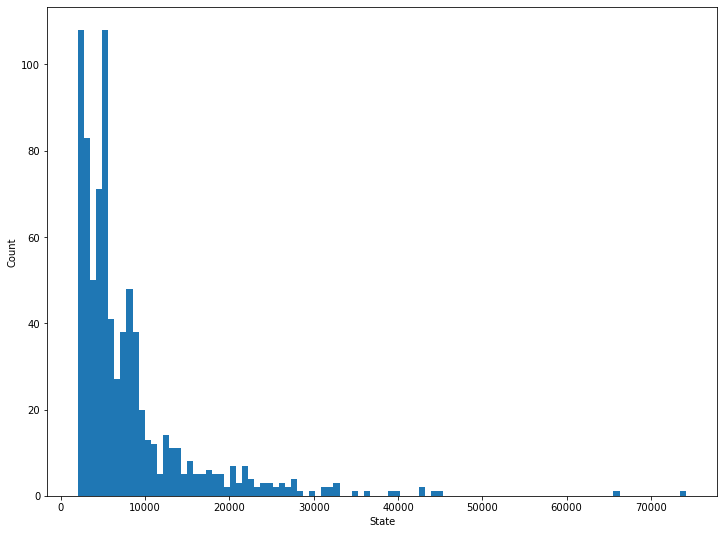

Arizona


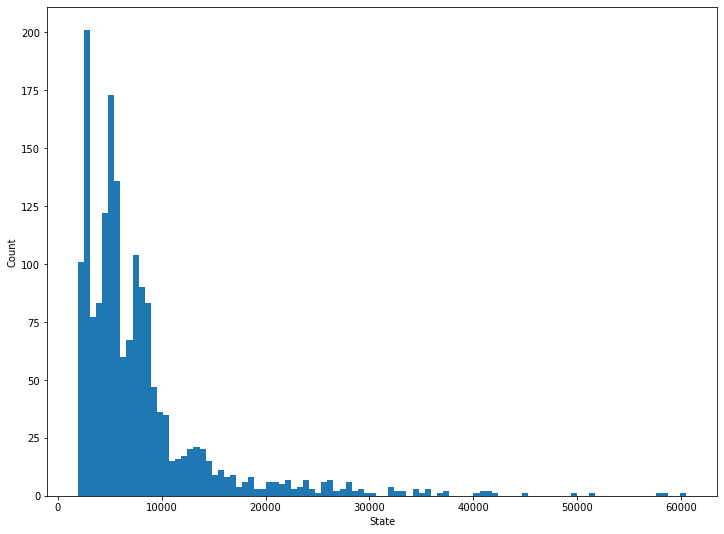

Nevada


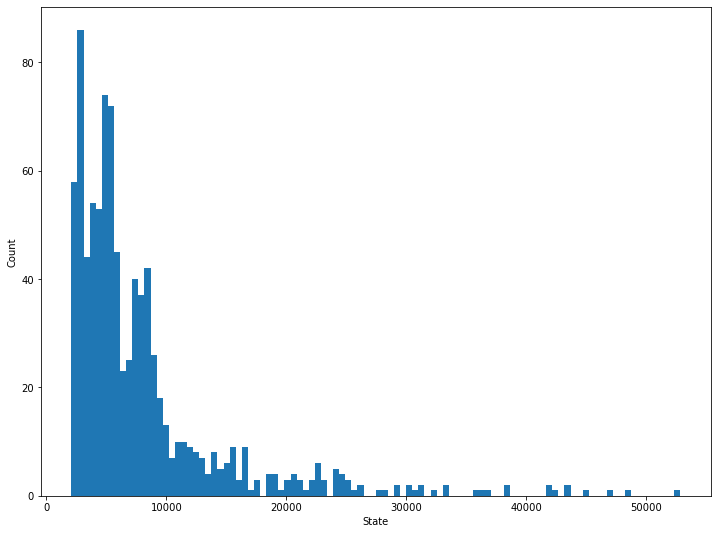

California


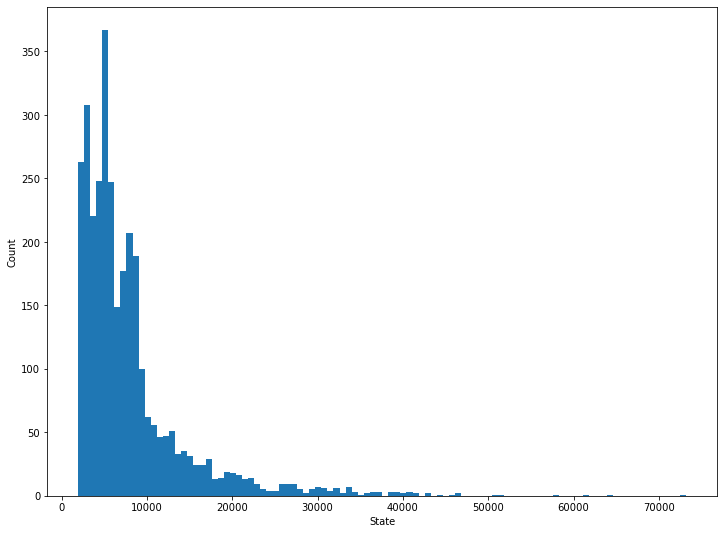

Oregon


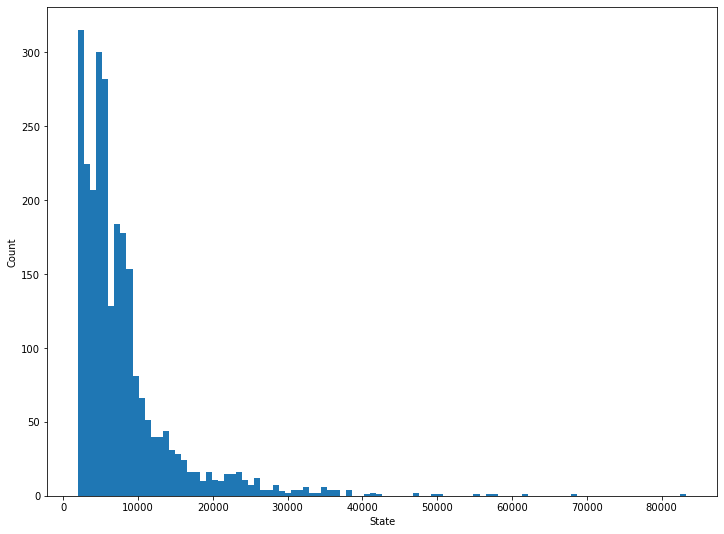

Response
No


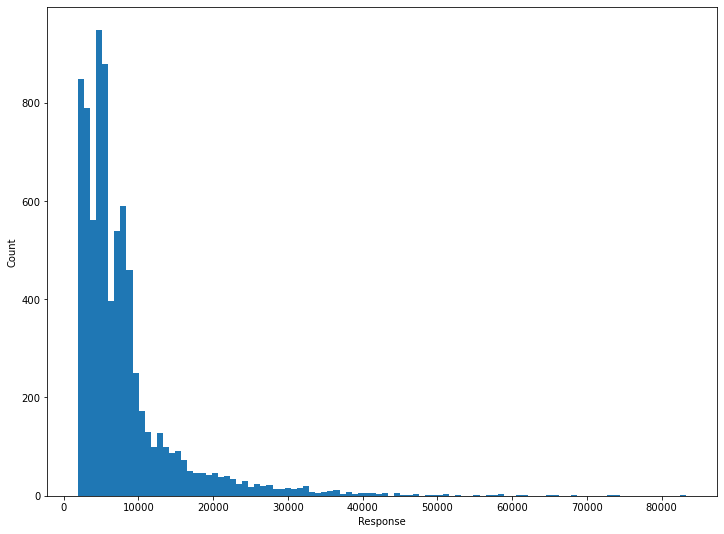

Yes


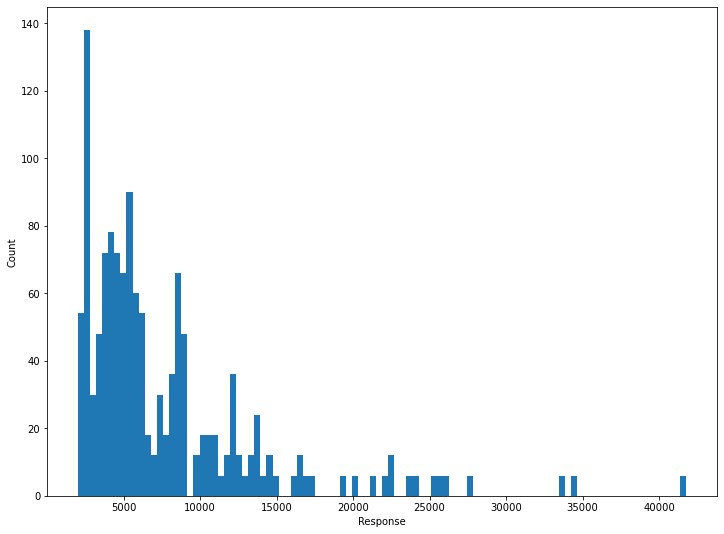

Coverage
Basic


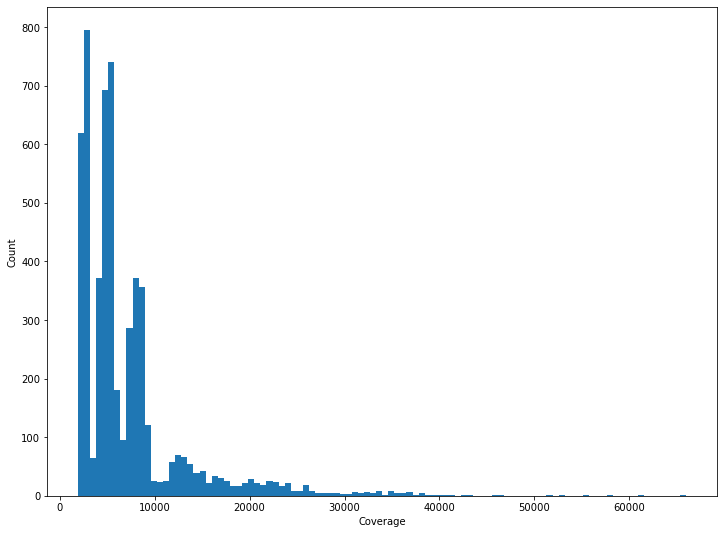

Extended


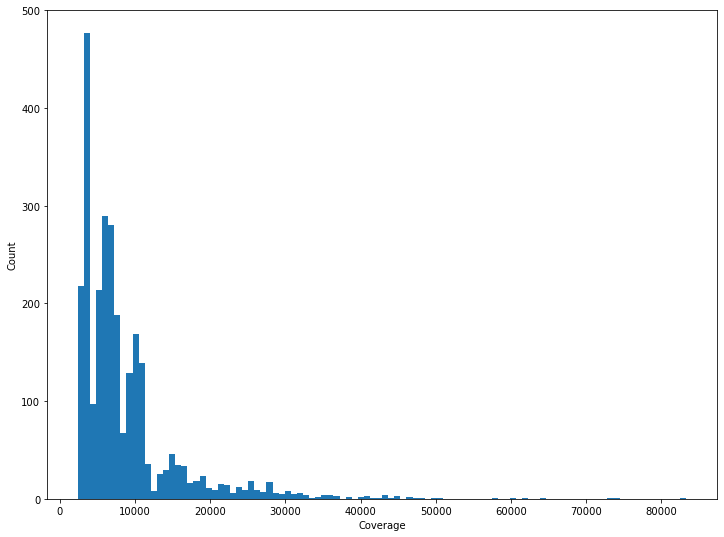

Premium


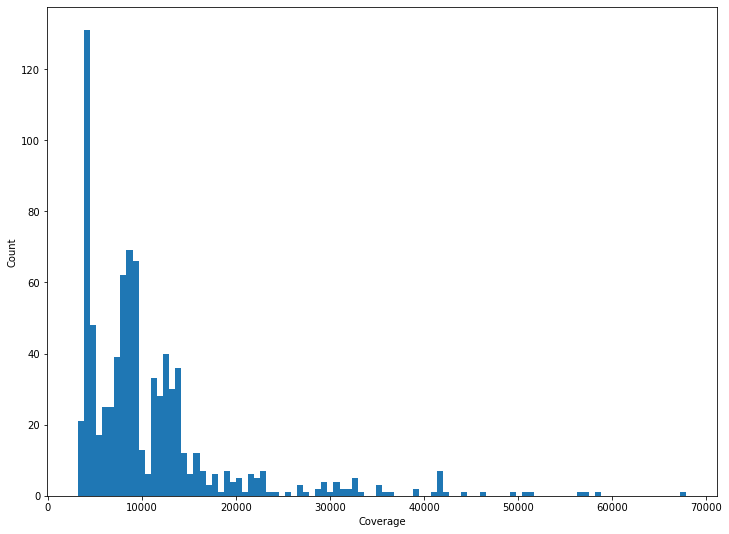

Education
Bachelor


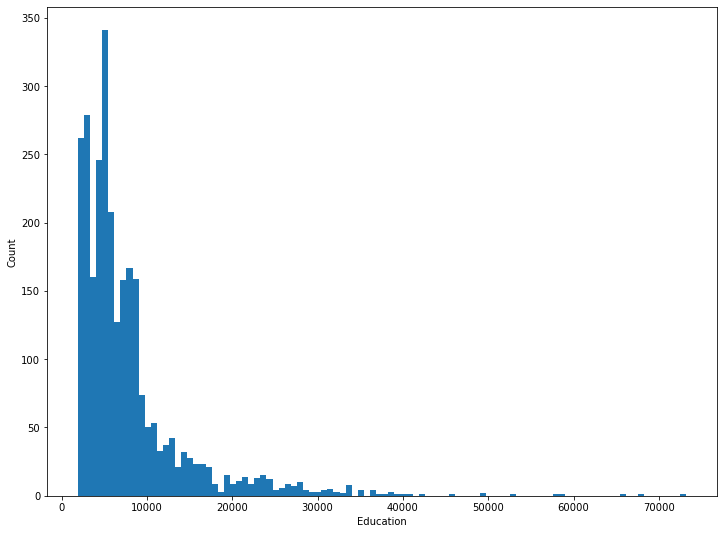

College


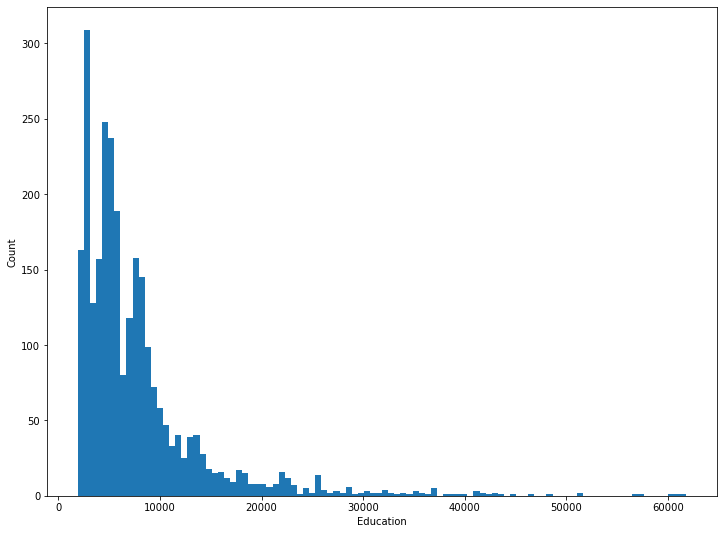

Master


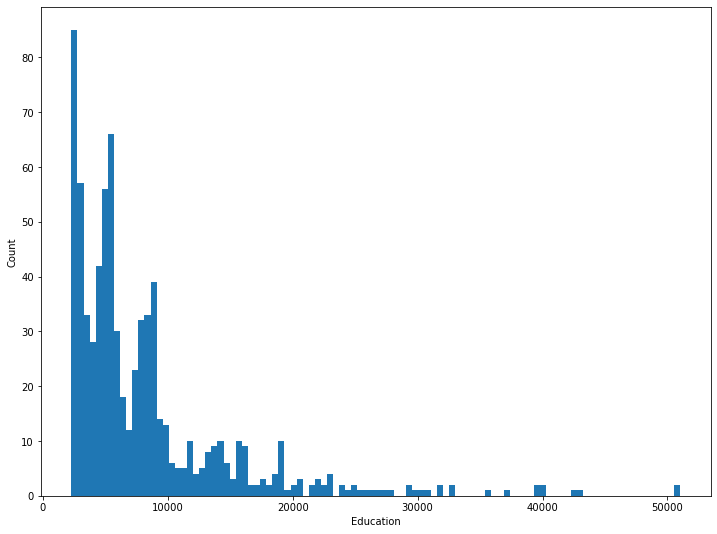

High School or Below


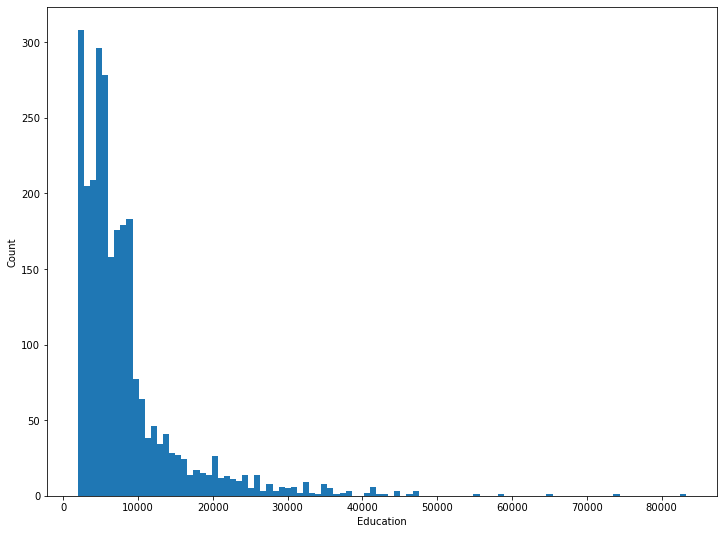

Doctor


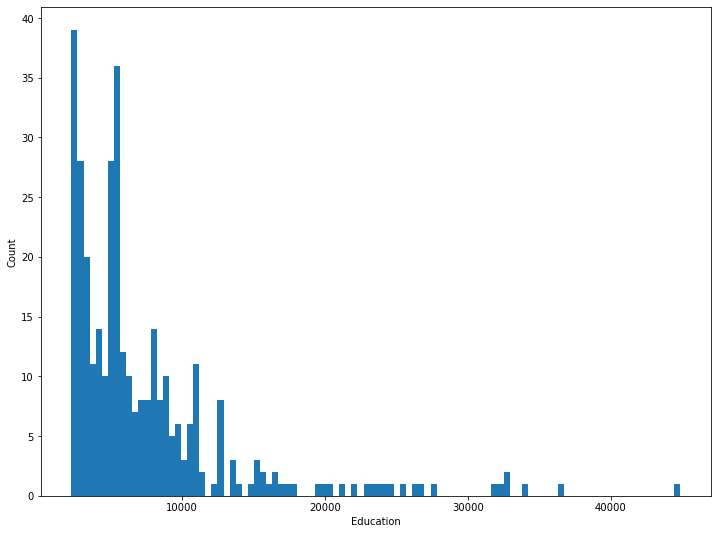

EmploymentStatus
Employed


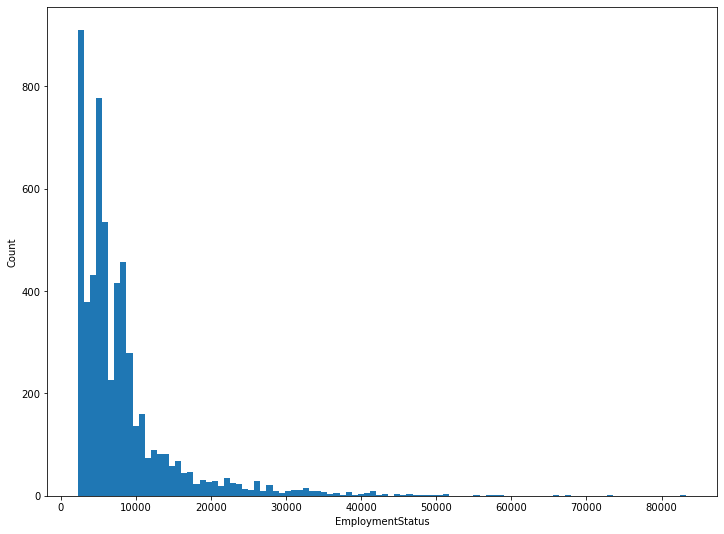

Unemployed


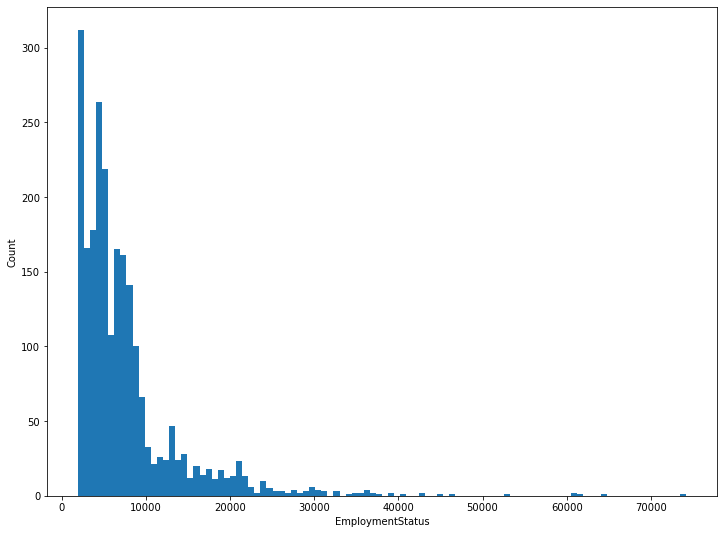

Medical Leave


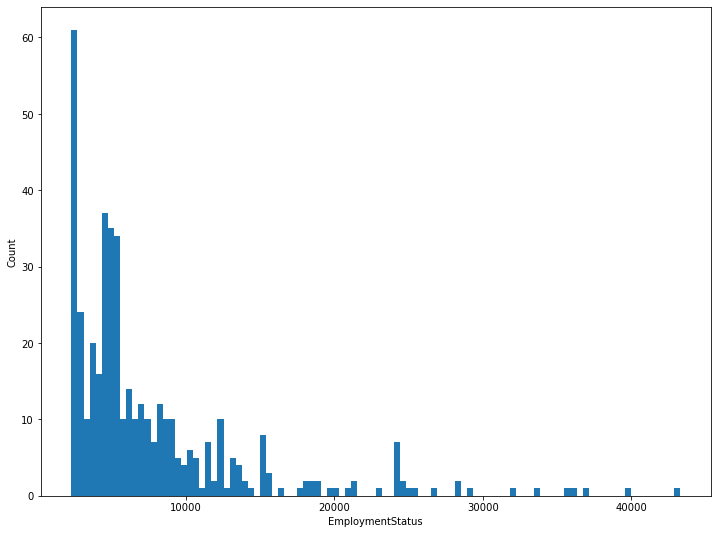

Disabled


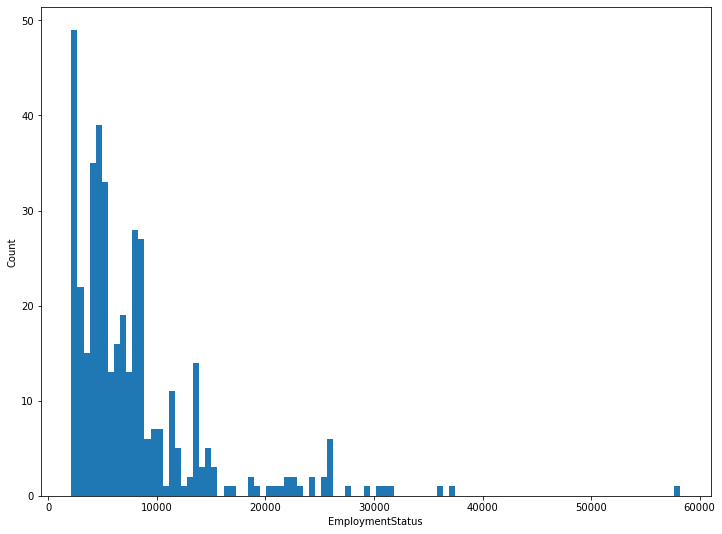

Retired


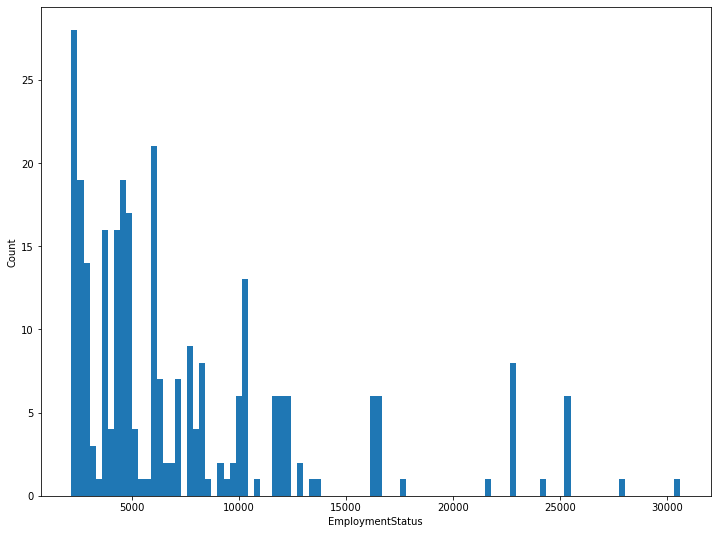

Gender
F


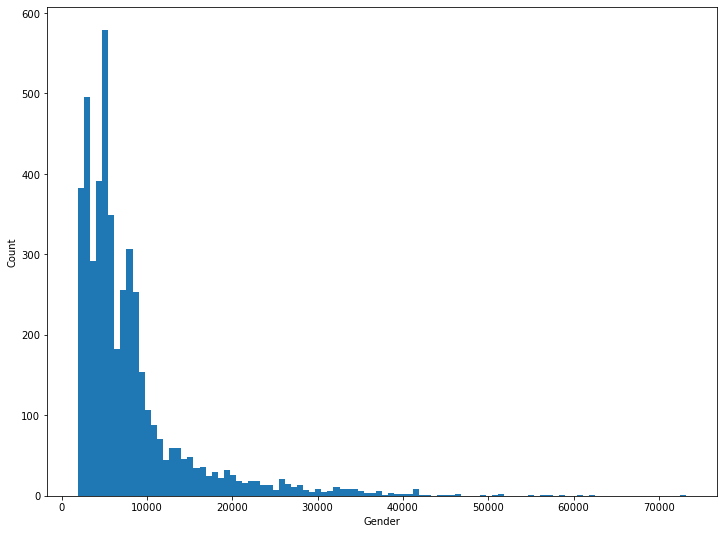

M


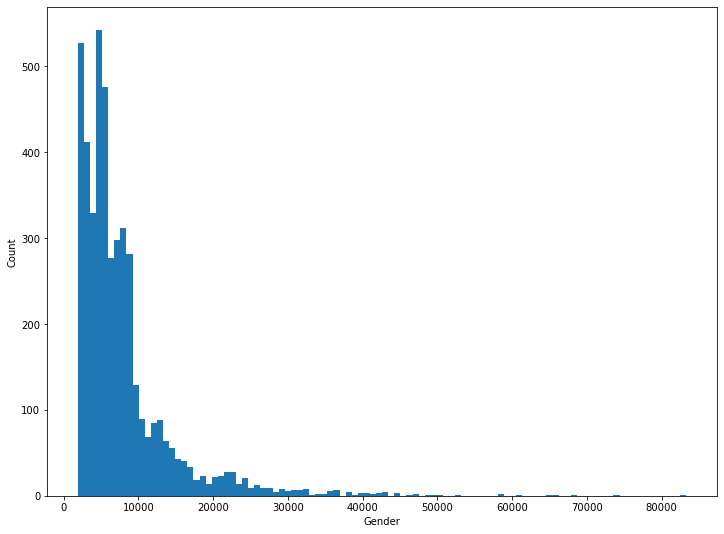

Marital Status
Married


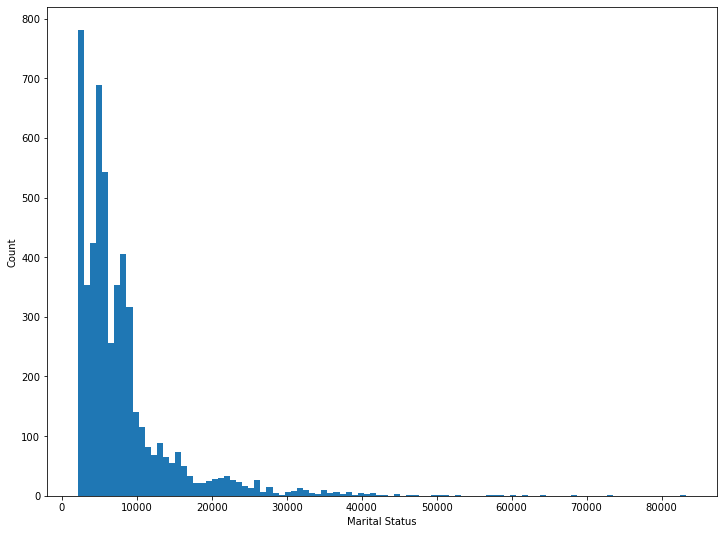

Single


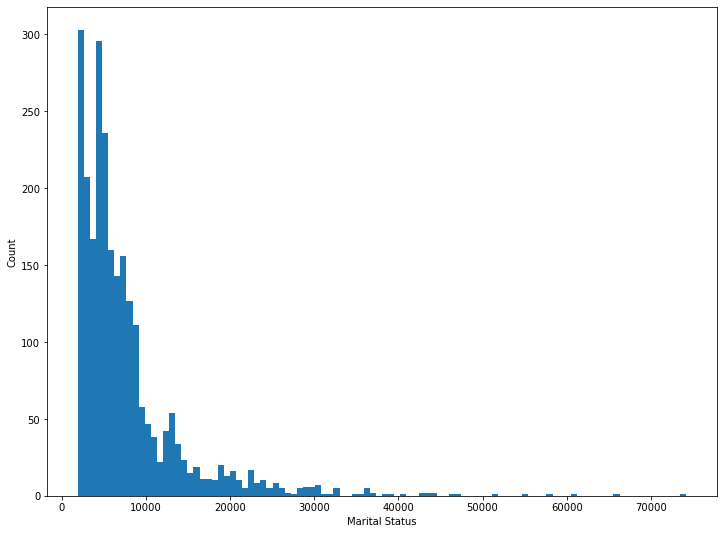

Divorced


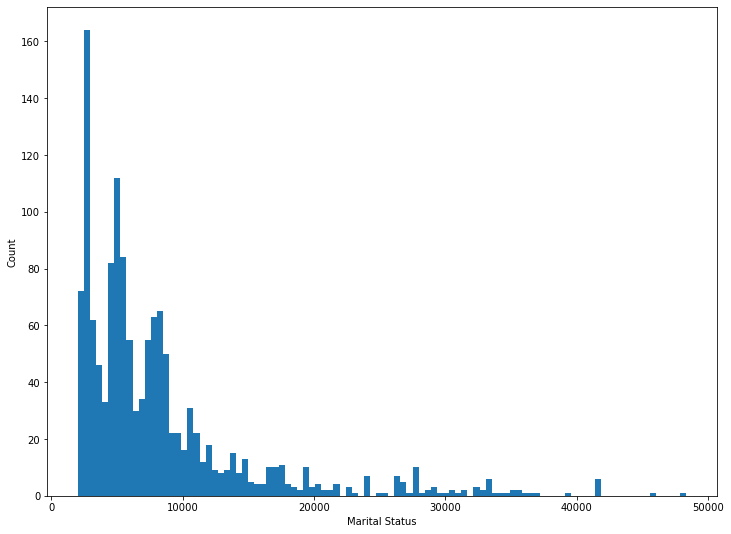

Number of Policies
1


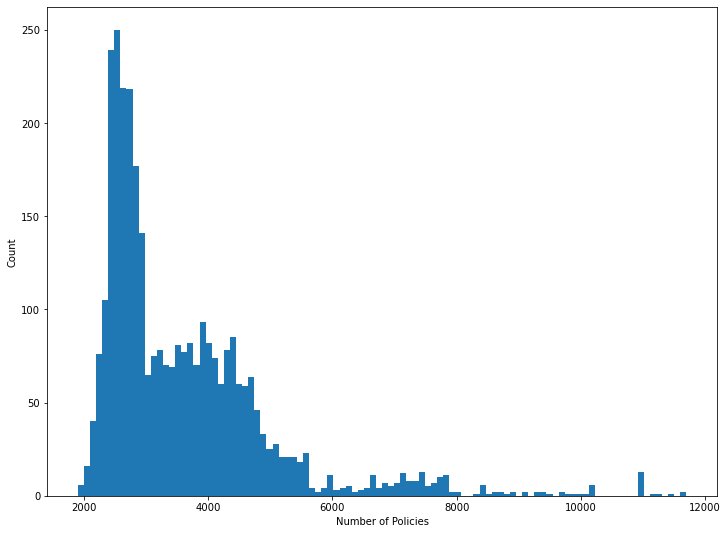

8


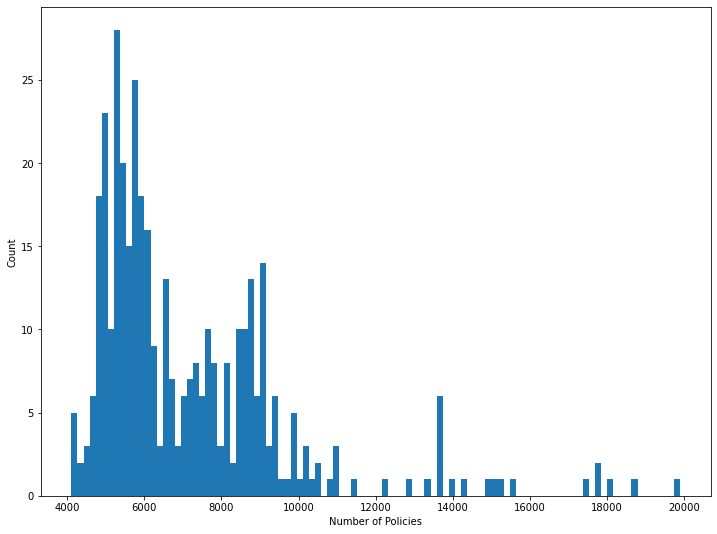

2


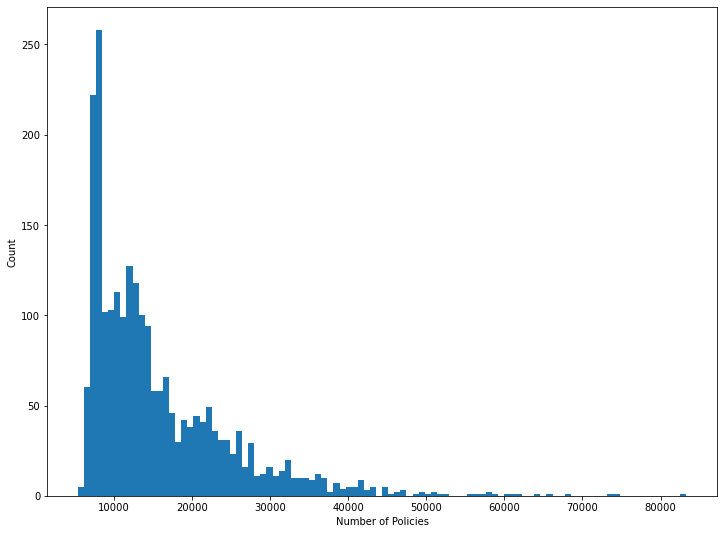

7


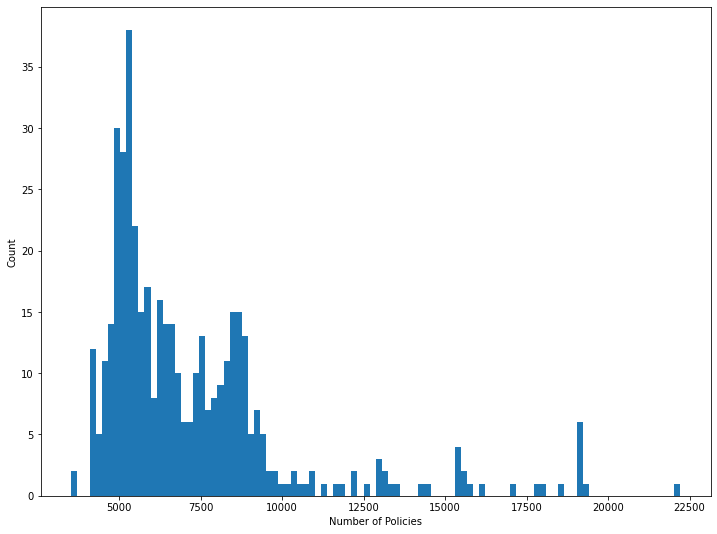

9


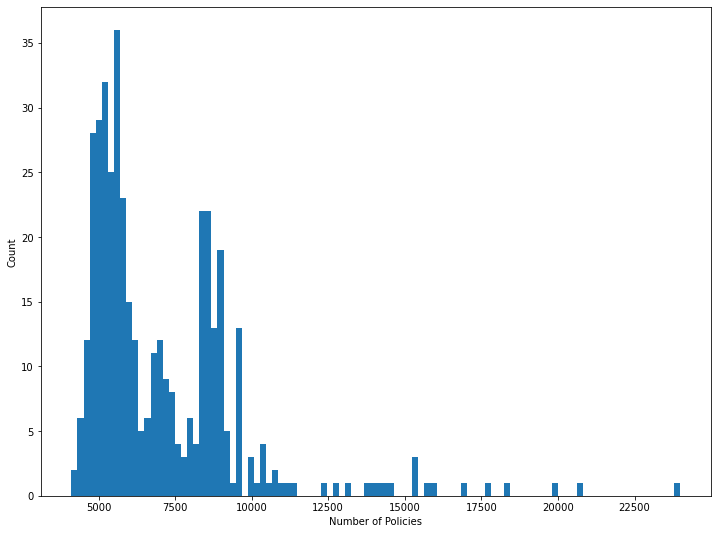

4


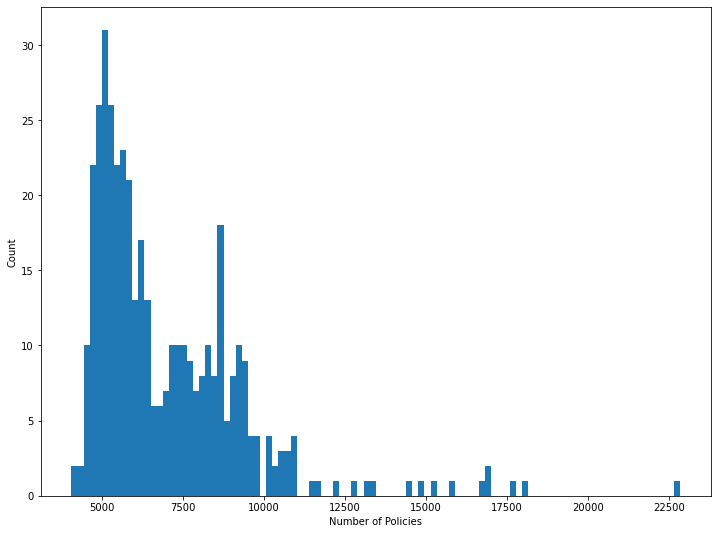

3


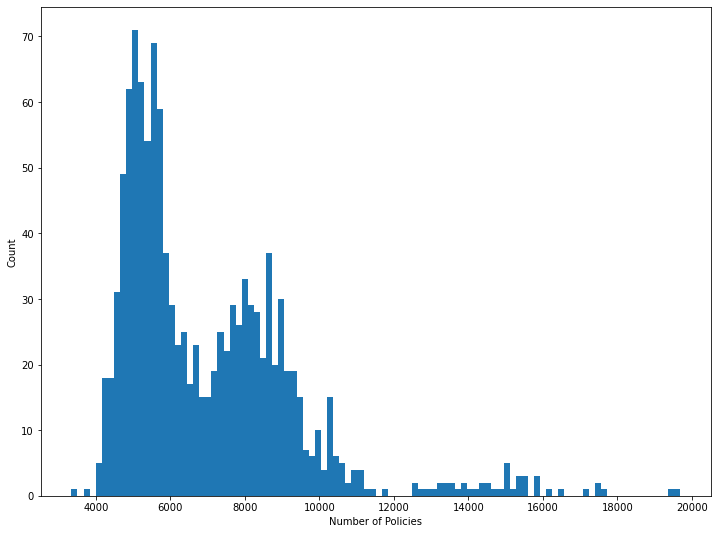

6


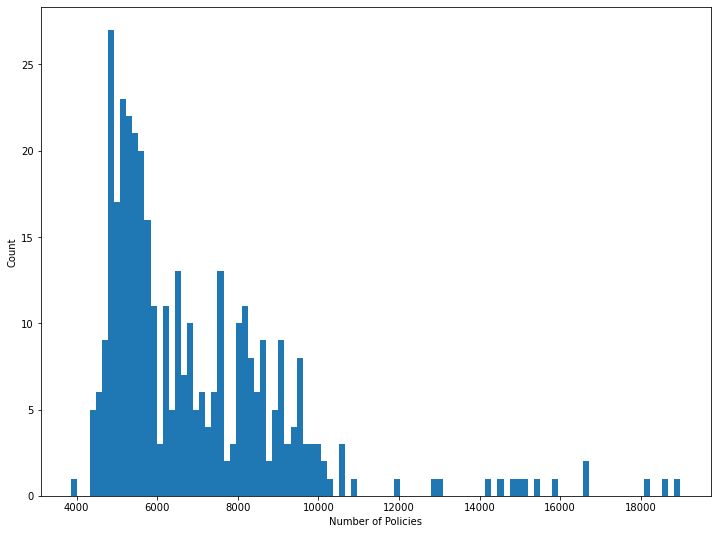

5


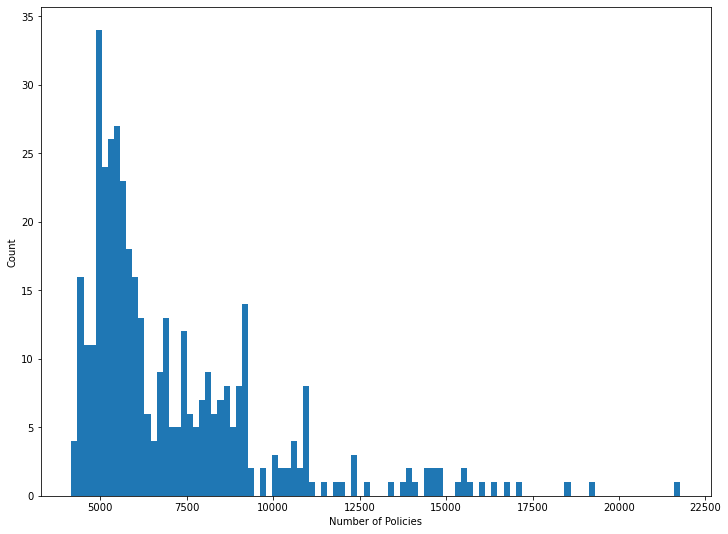

Policy Type
Corporate Auto


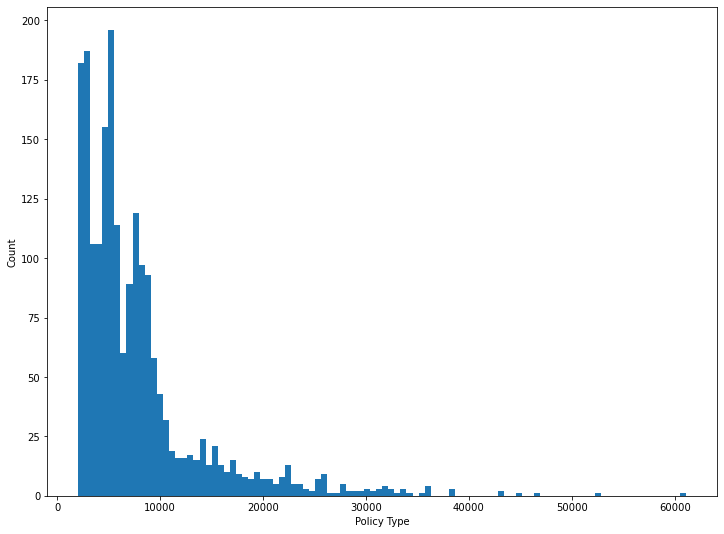

Personal Auto


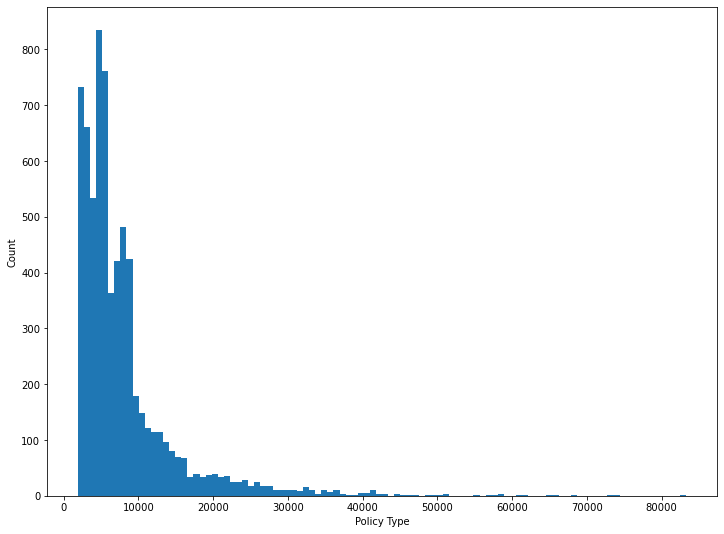

Special Auto


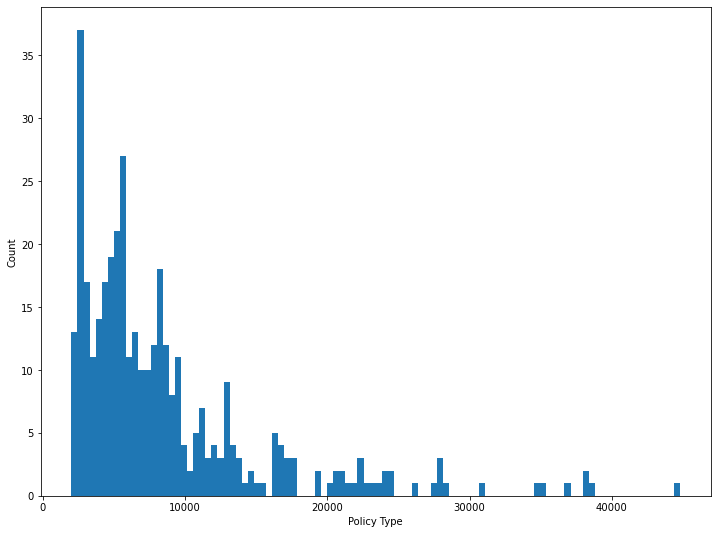

Policy
Corporate L3


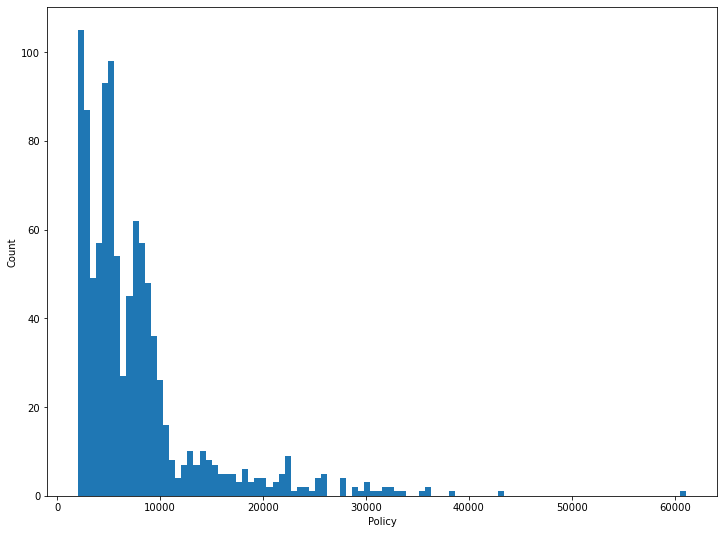

Personal L3


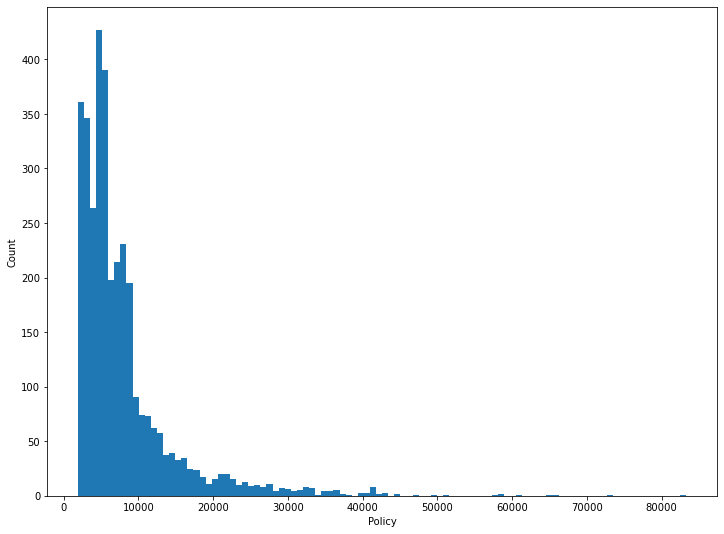

Corporate L2


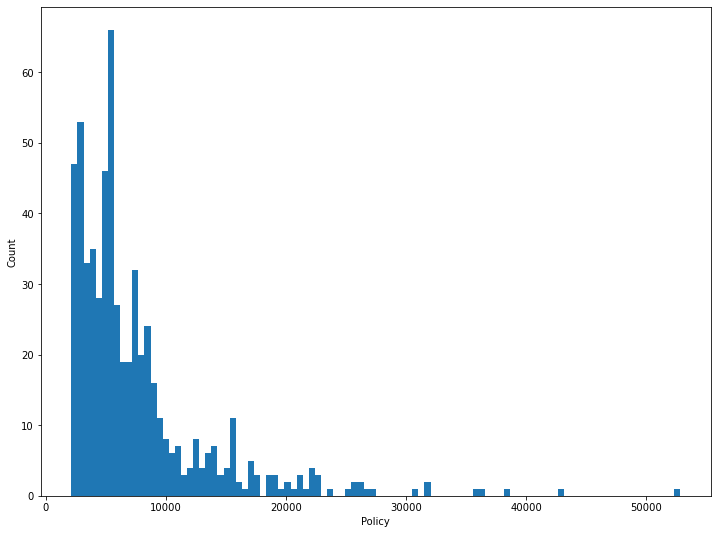

Personal L1


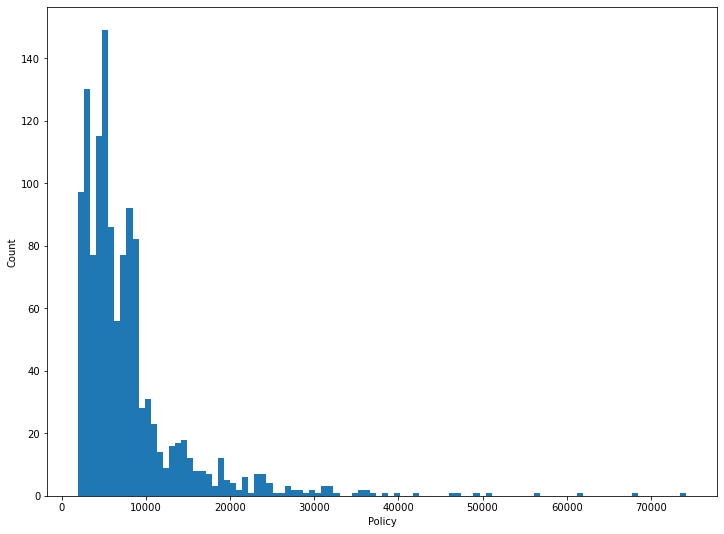

Special L2


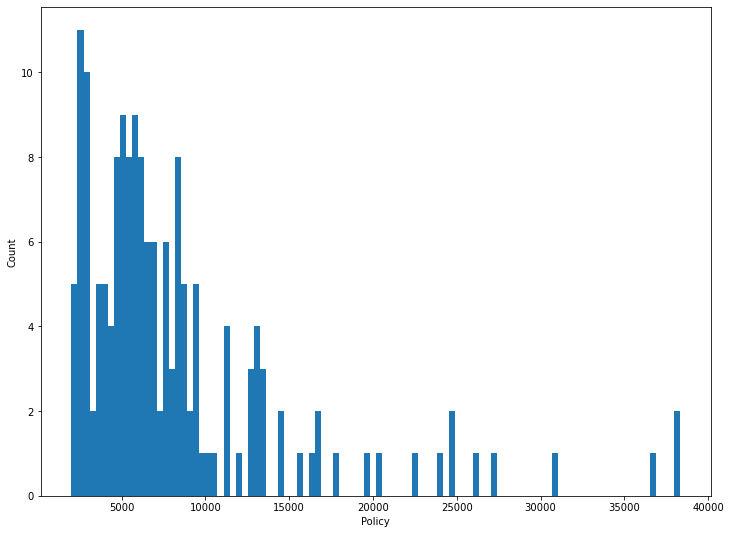

Corporate L1


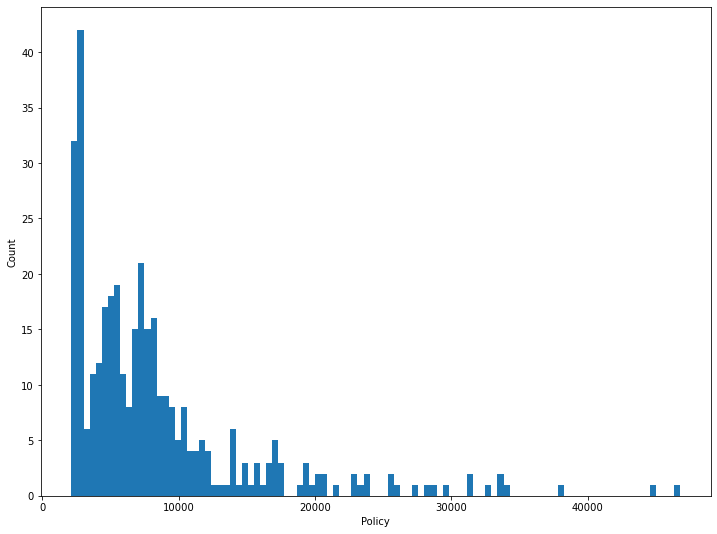

Personal L2


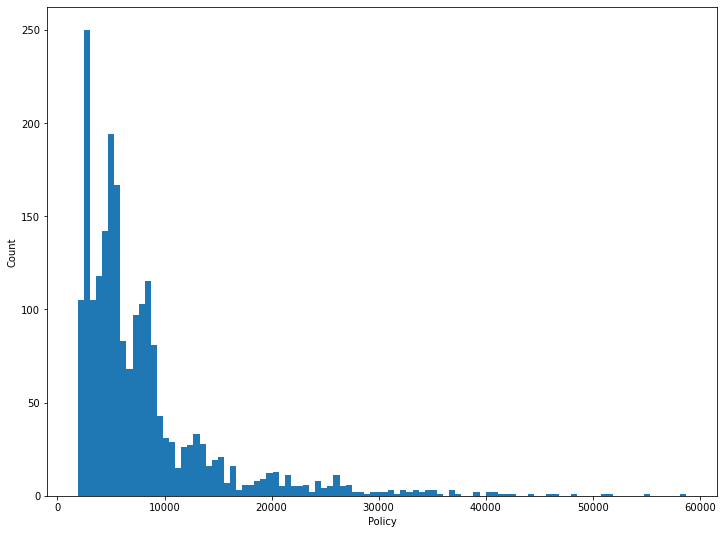

Special L1


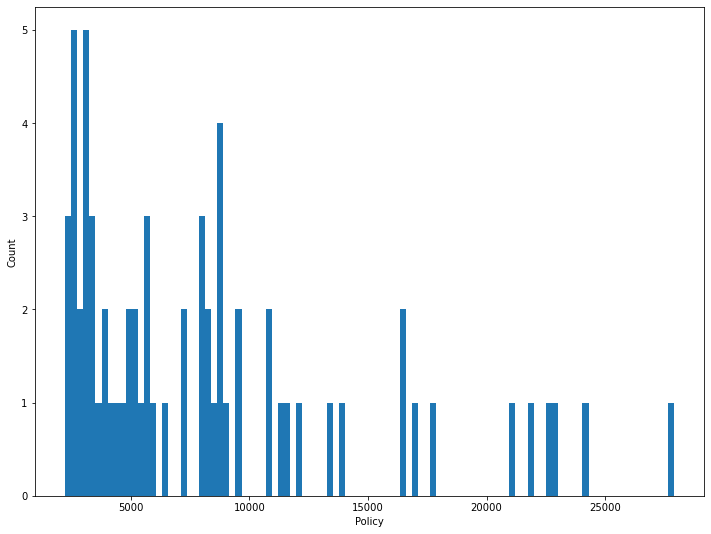

Special L3


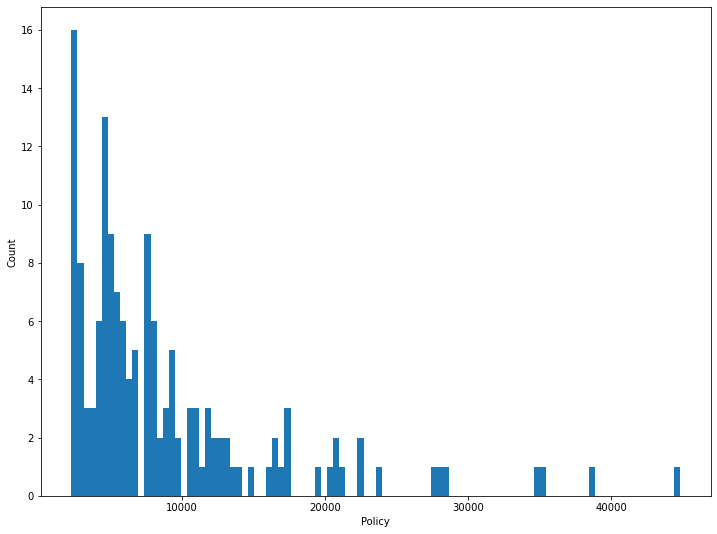

Renew Offer Type
Offer1


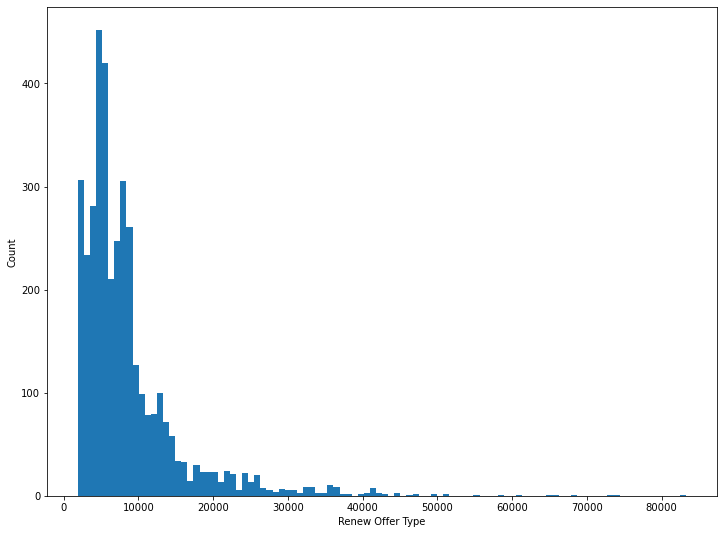

Offer3


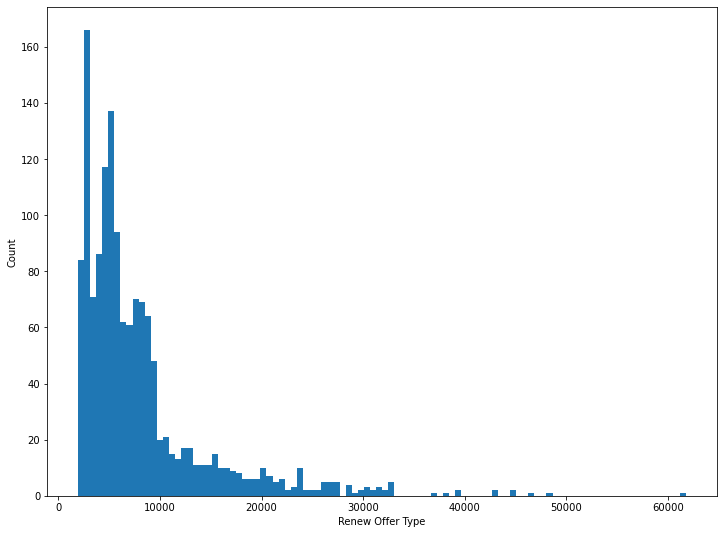

Offer2


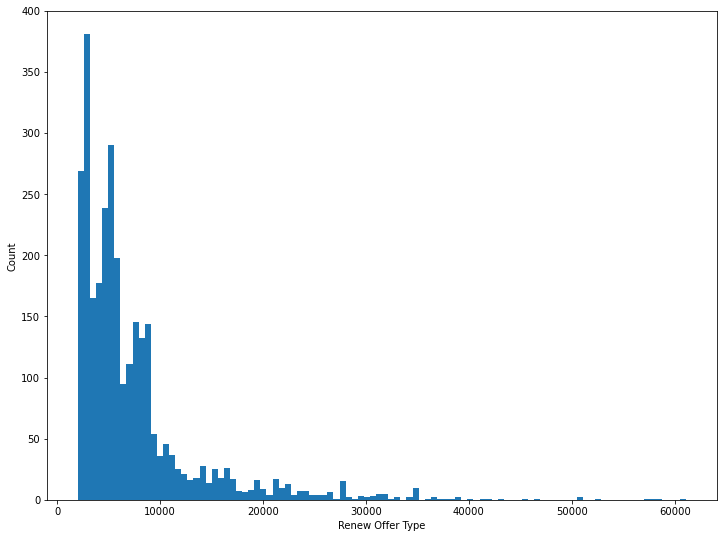

Offer4


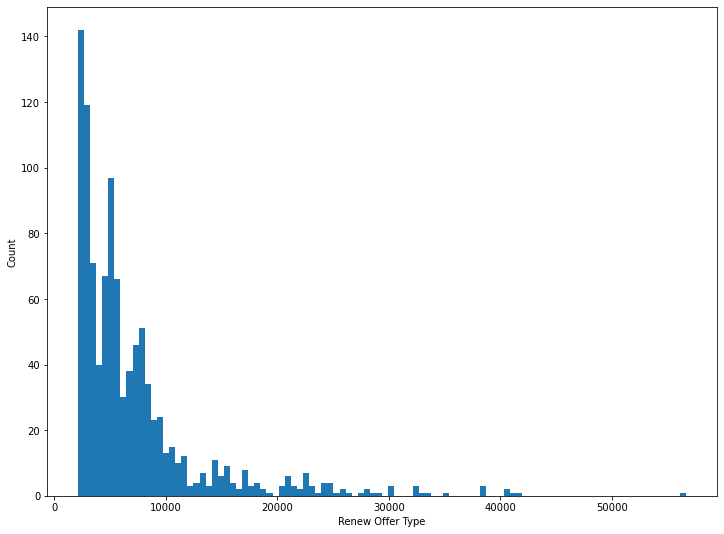

Sales Channel
Agent


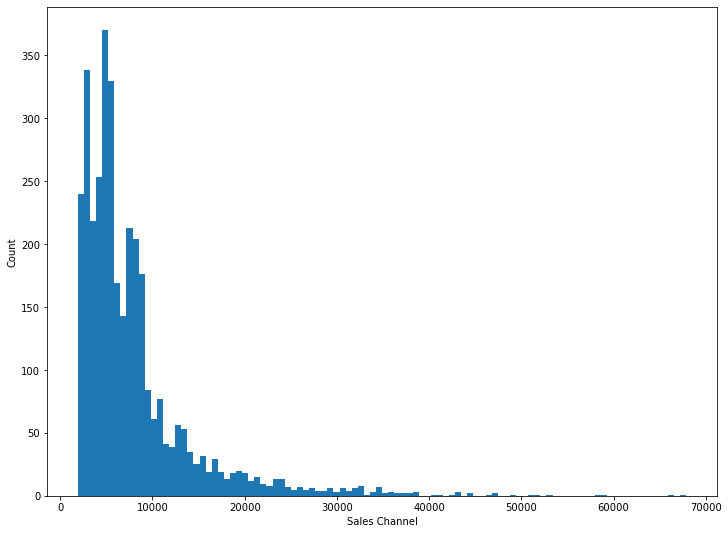

Call Center


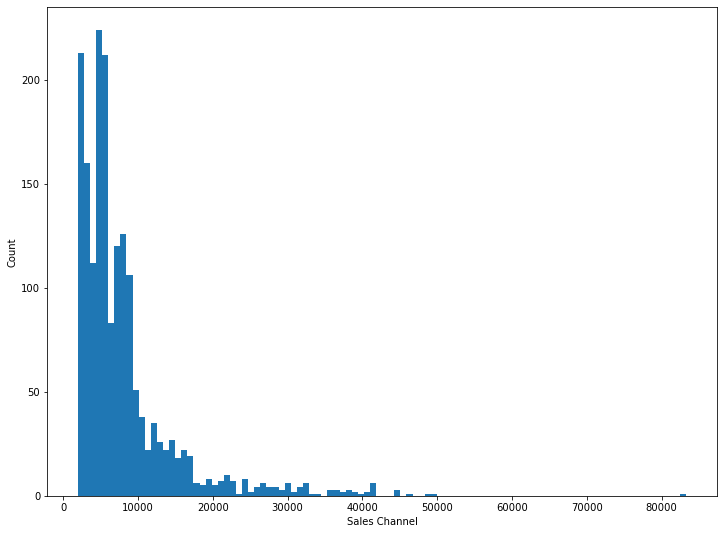

Web


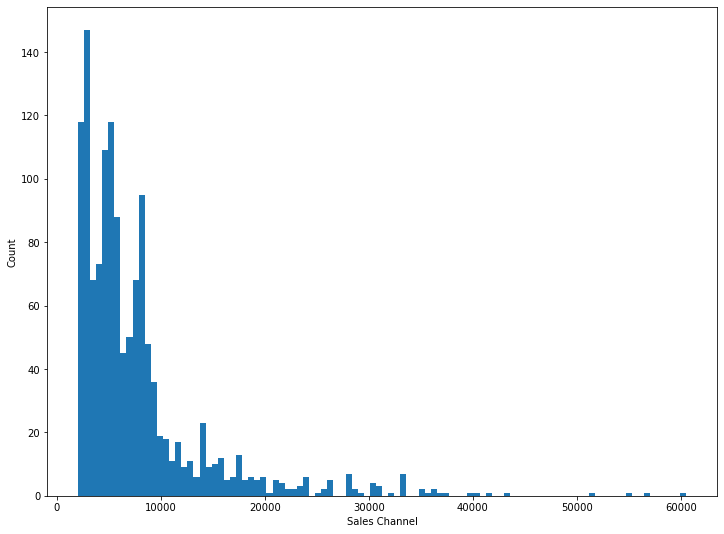

Branch


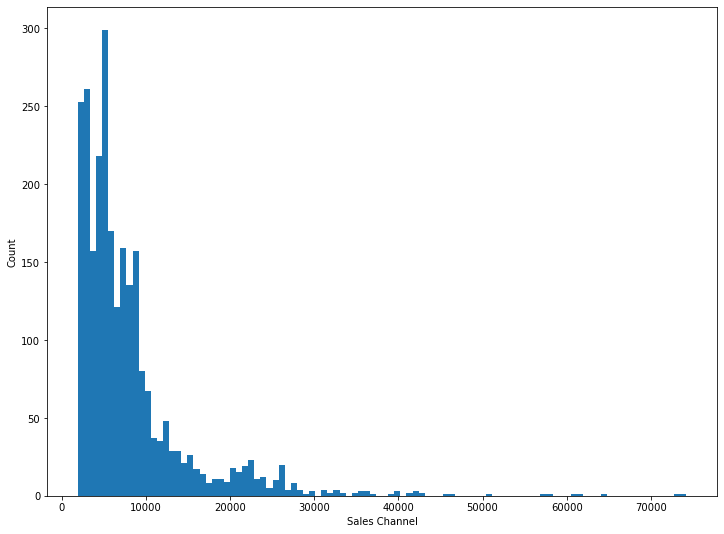

Vehicle Class
Two-Door Car


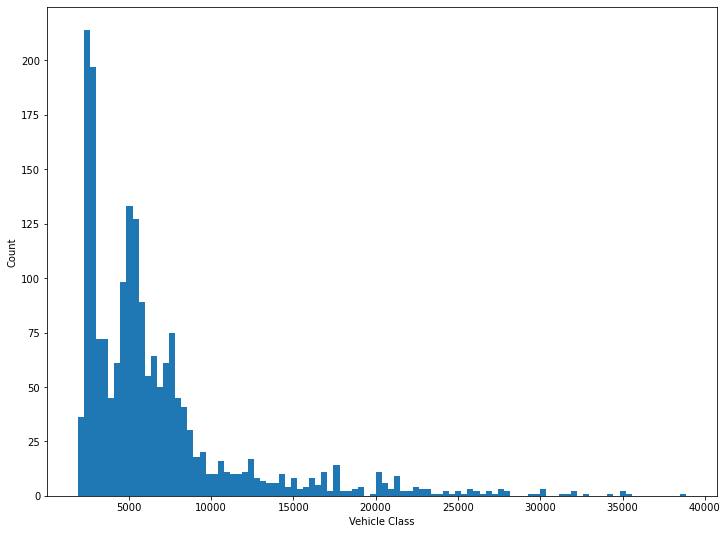

Four-Door Car


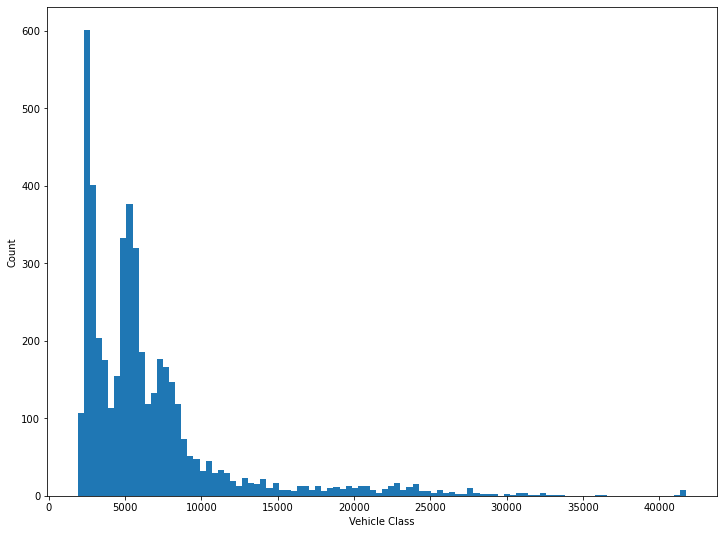

SUV


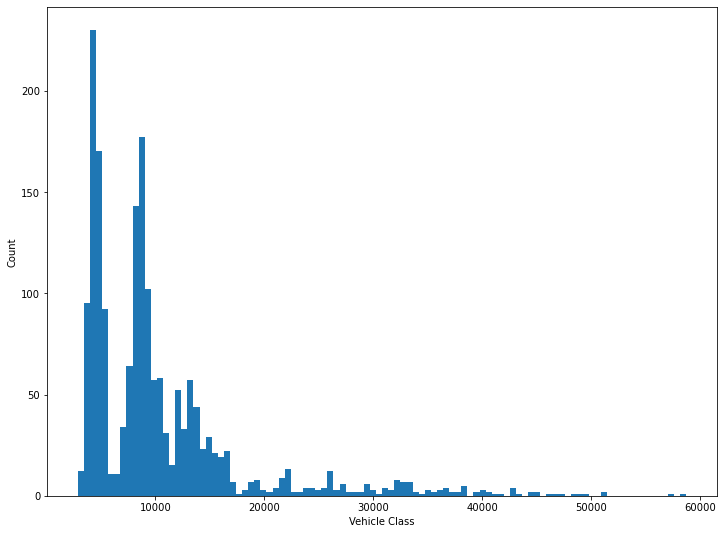

Luxury SUV


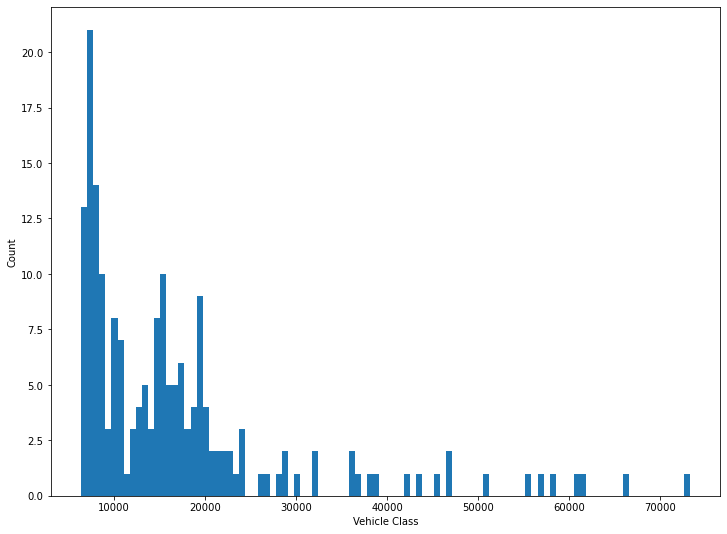

Sports Car


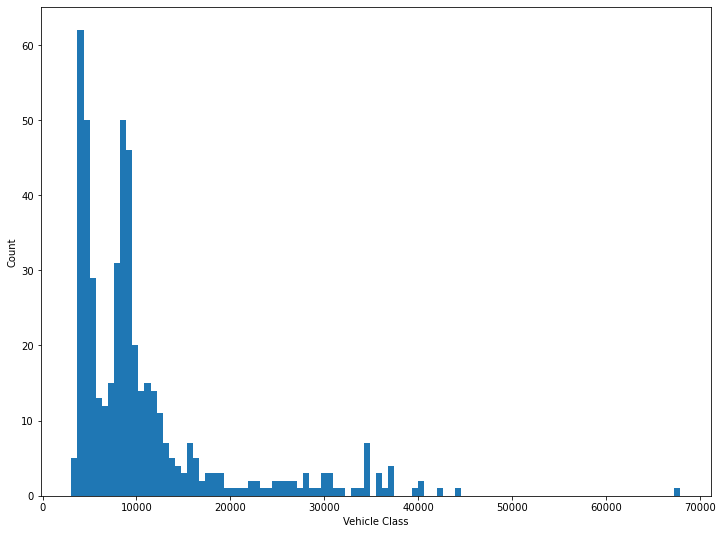

Luxury Car


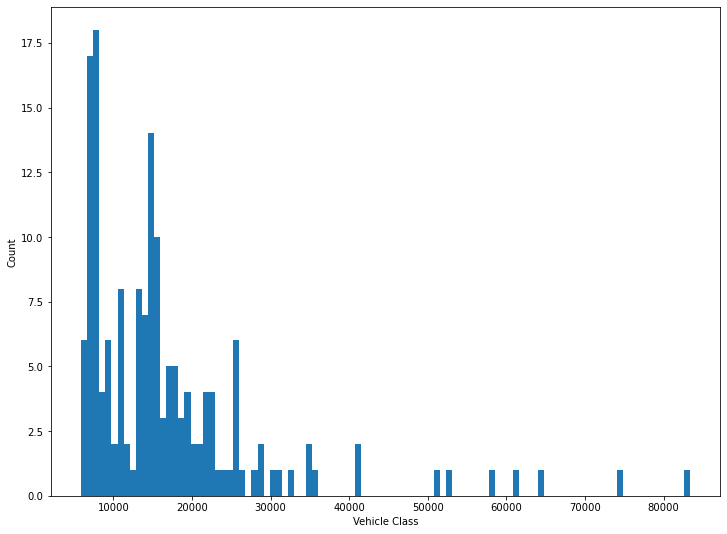

Vehicle Size
Medsize


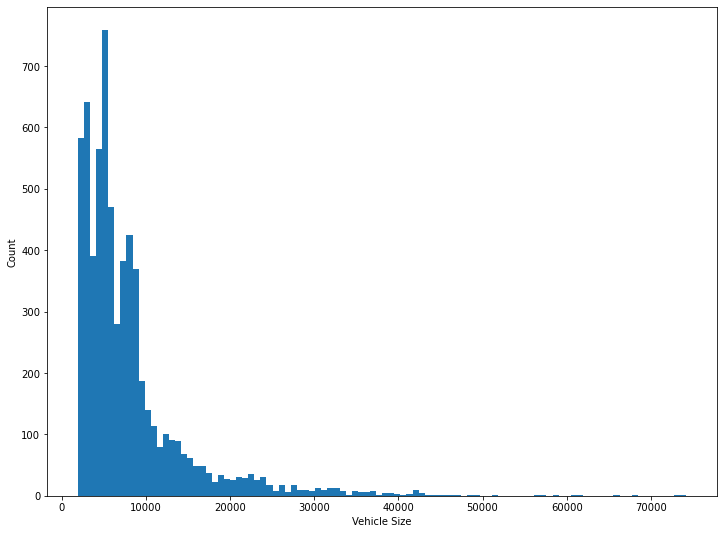

Small


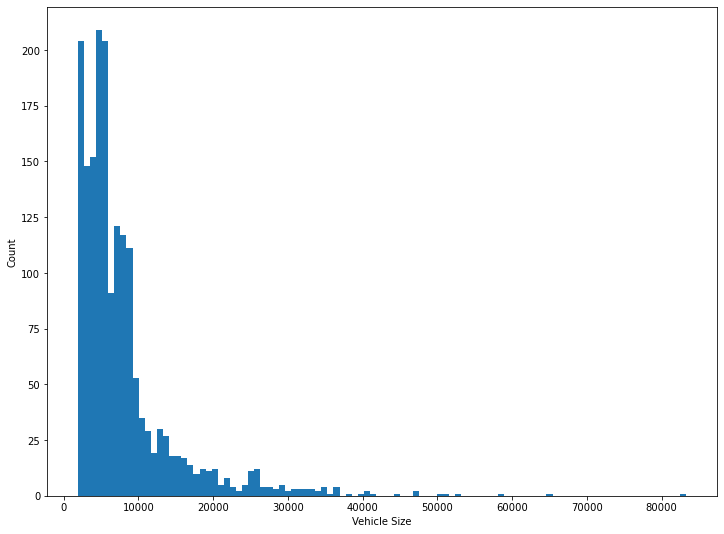

Large


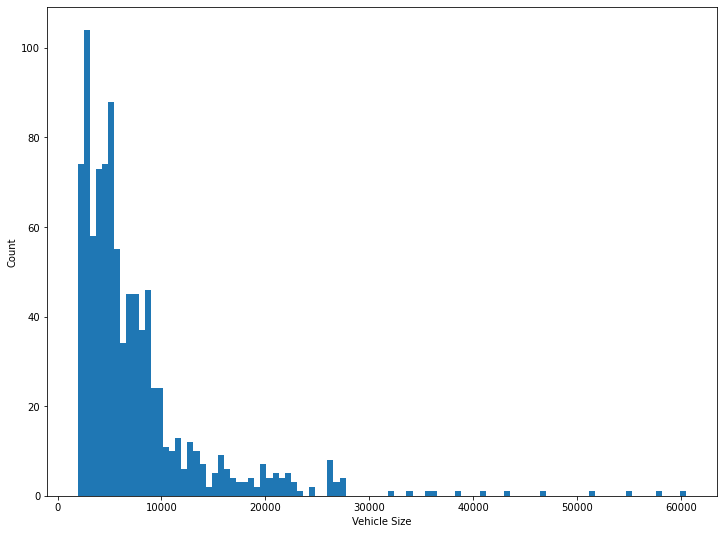

In [33]:
for i in categorical_var:
    l=df[i].unique()
    print(i)
    for j in l:
        print(j)
        plt.figure(figsize = (12, 9))
        plt.hist(df[df[i]==j]['Customer Lifetime Value'], bins = 100)
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.show()

Bivariate Analysis between numerical variables

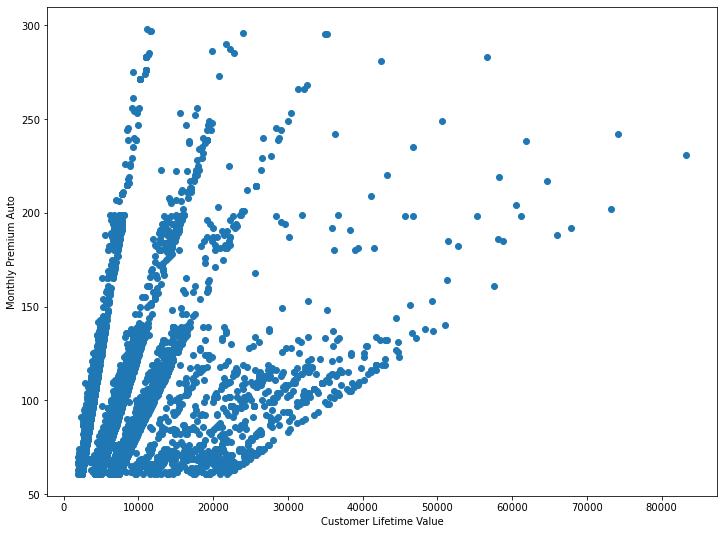

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 9))
plt.scatter(df['Customer Lifetime Value'], df['Monthly Premium Auto'])
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Monthly Premium Auto')
plt.show()

It appears to be multilinear.

To Visualize how other Categorical variables are responsible or that could possibly separate out the lines.

In [10]:
categorical_var=['State', 'Response', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender',
       'Marital Status', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size']

State
Arizona


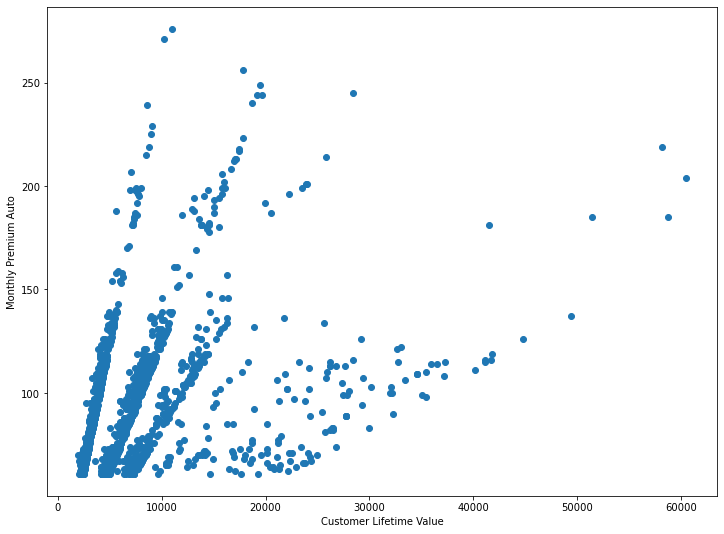

California


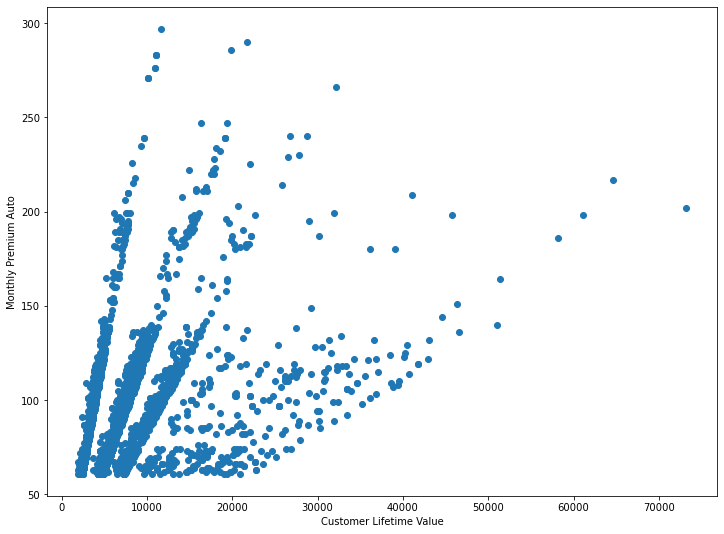

Nevada


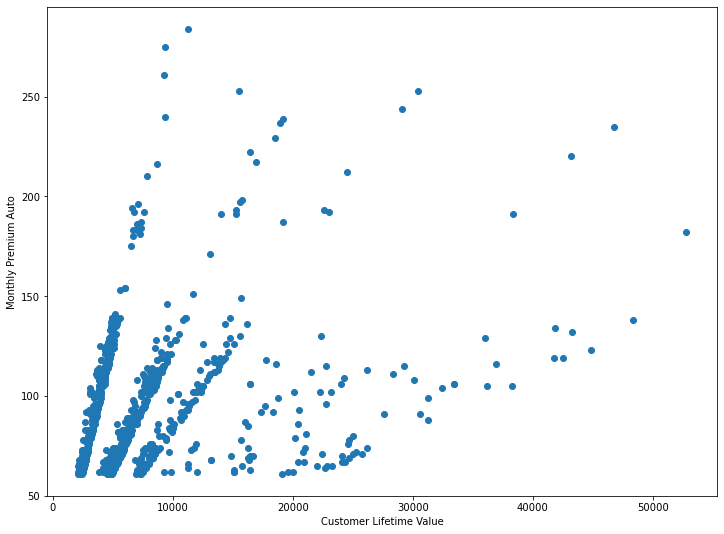

Oregon


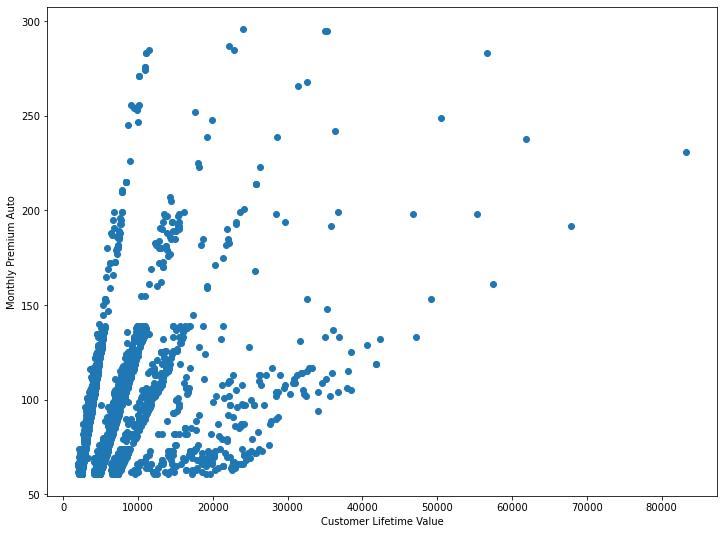

Washington


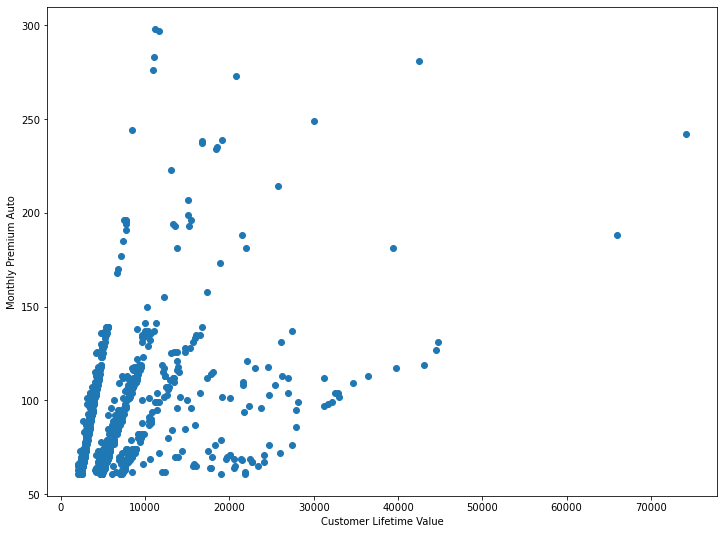

Response
No


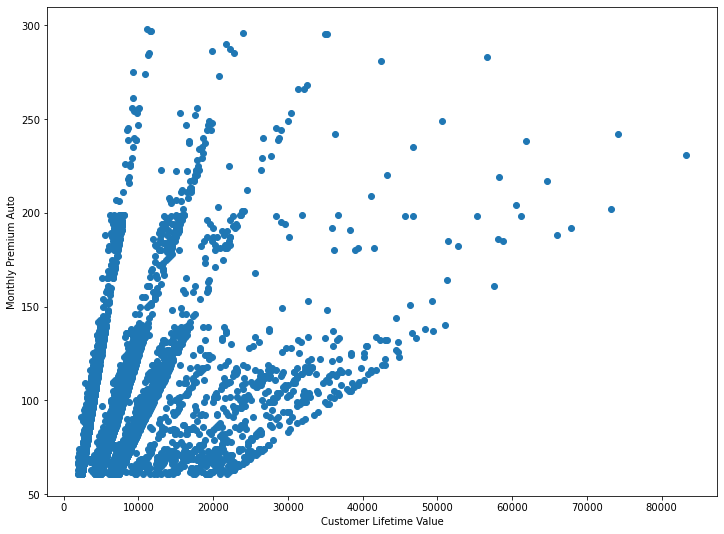

Yes


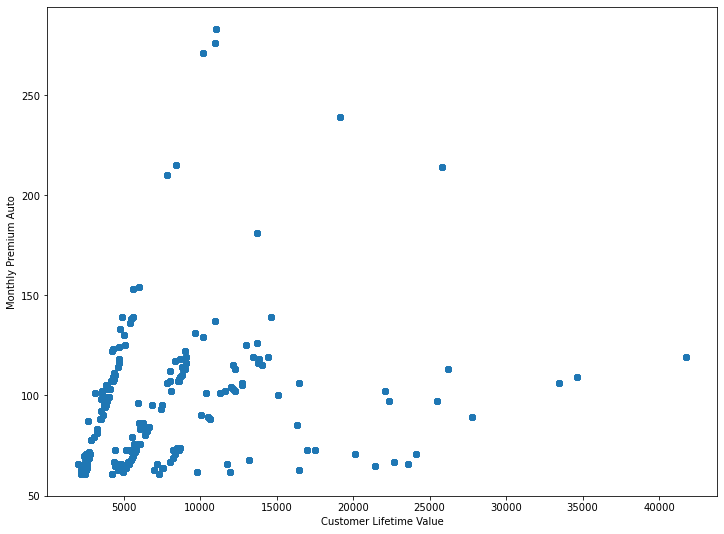

Coverage
Basic


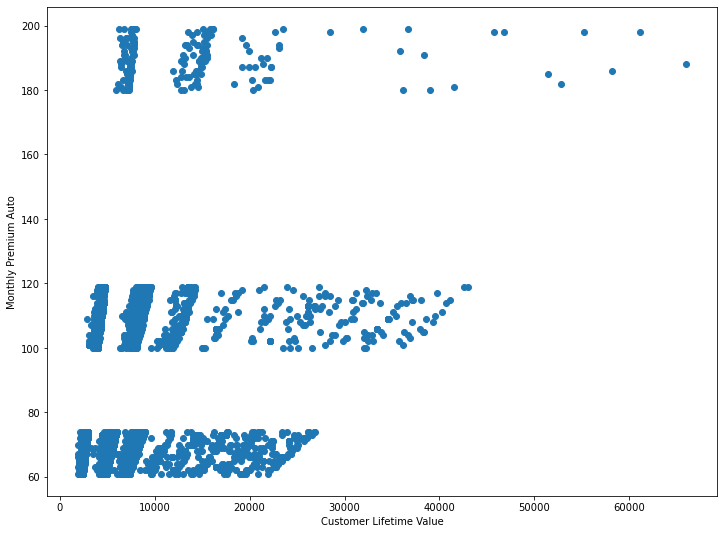

Extended


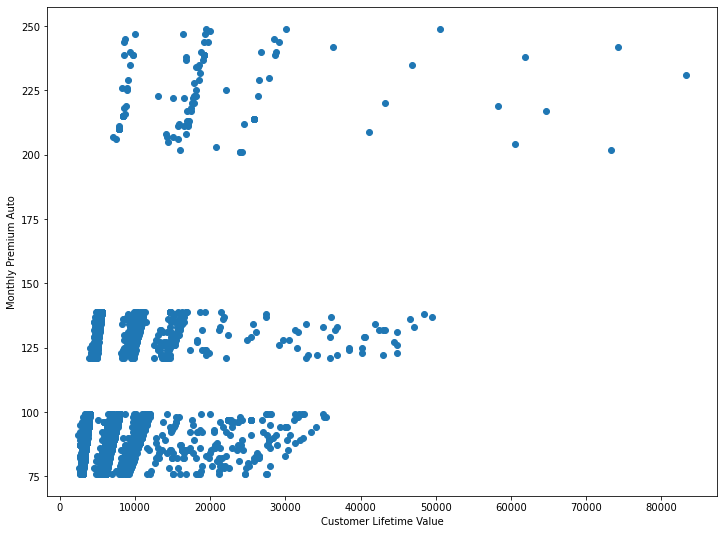

Premium


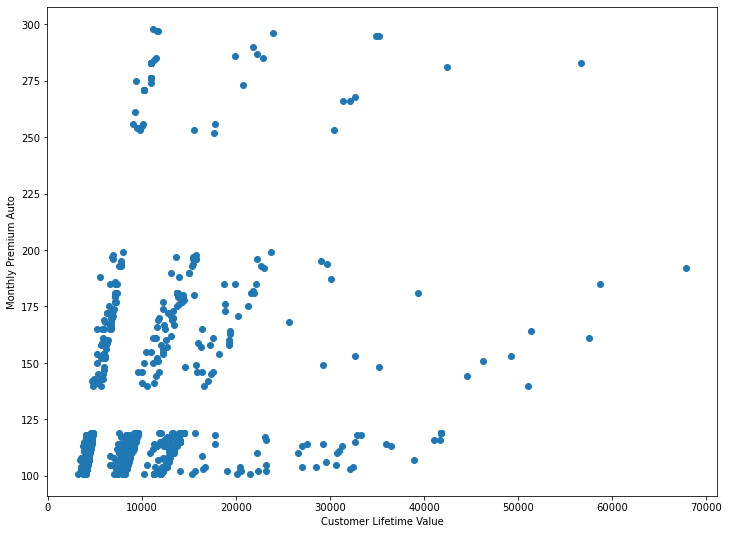

Education
Bachelor


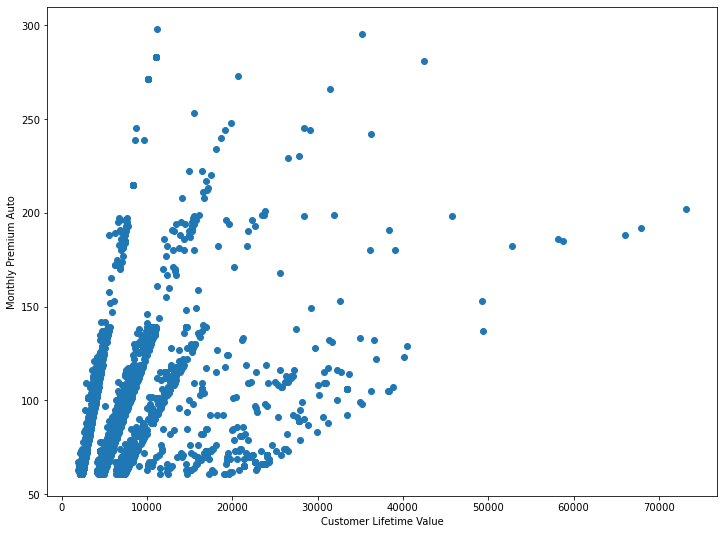

College


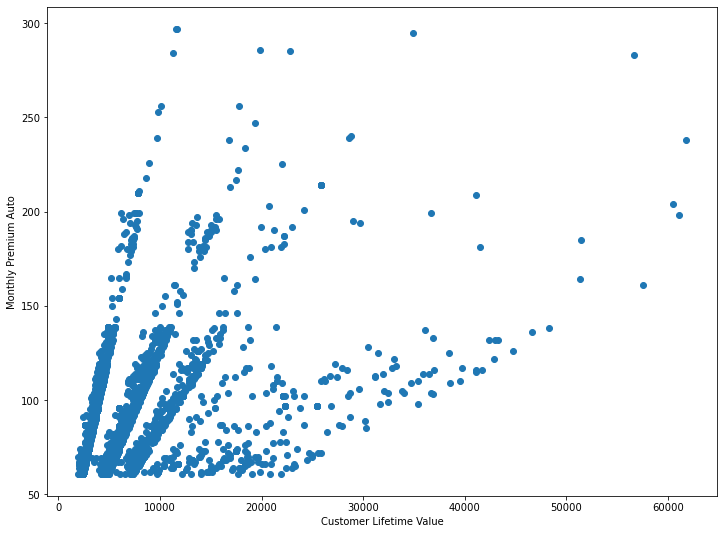

Doctor


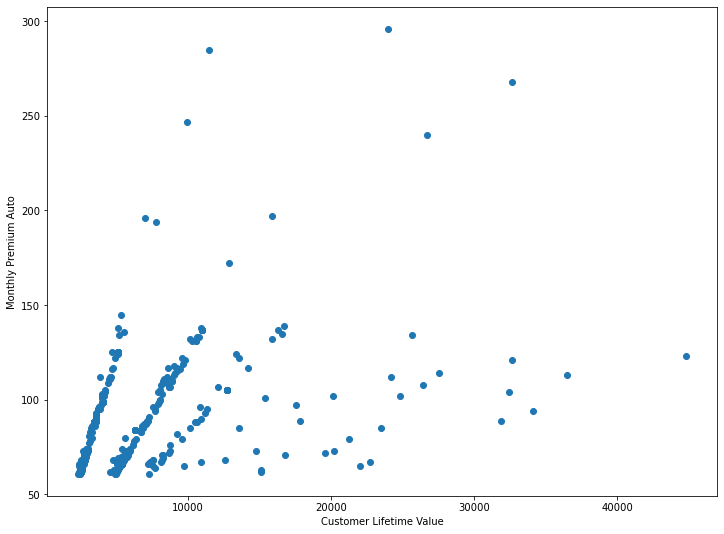

High School or Below


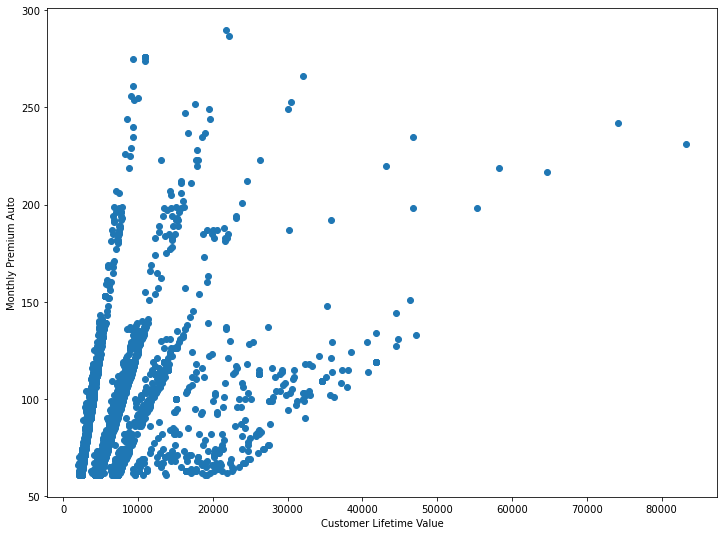

Master


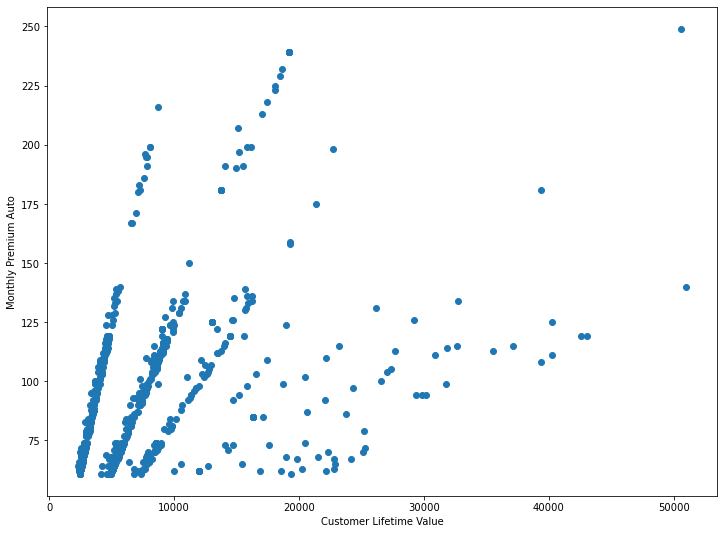

EmploymentStatus
Disabled


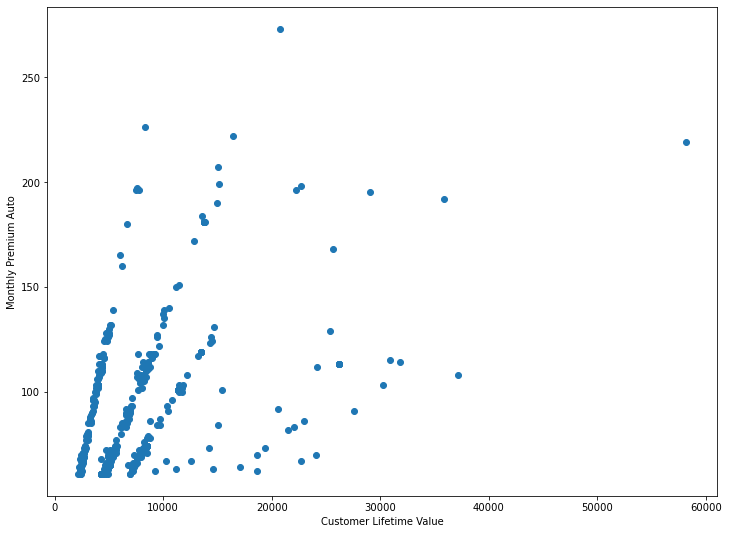

Employed


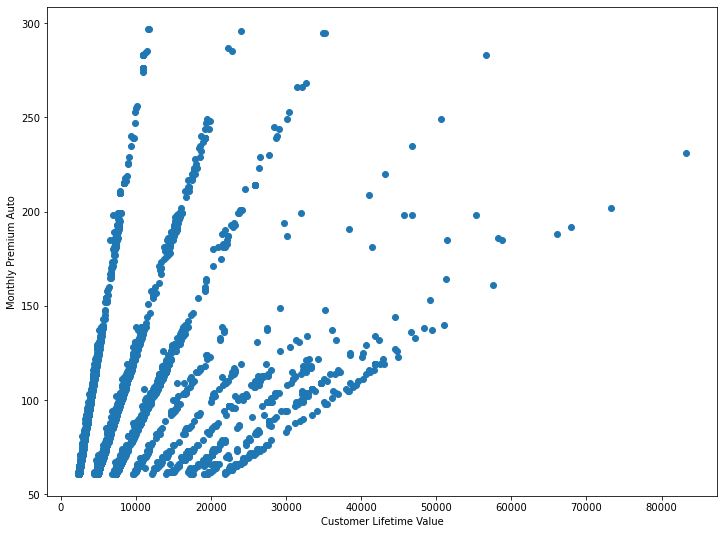

Medical Leave


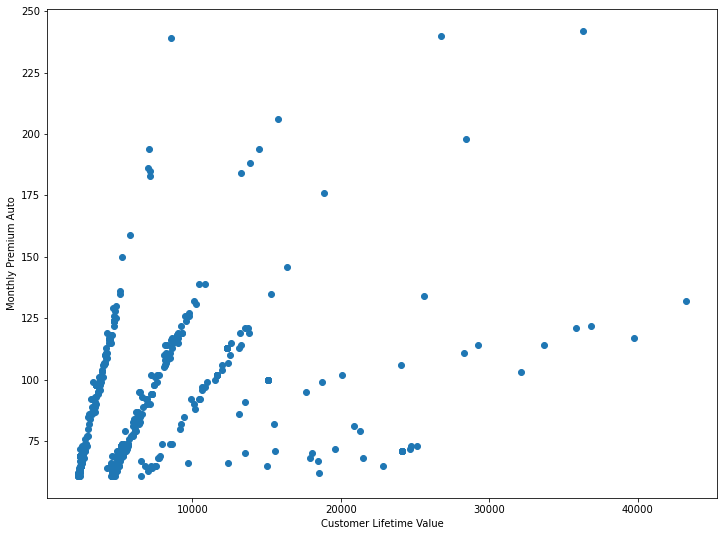

Retired


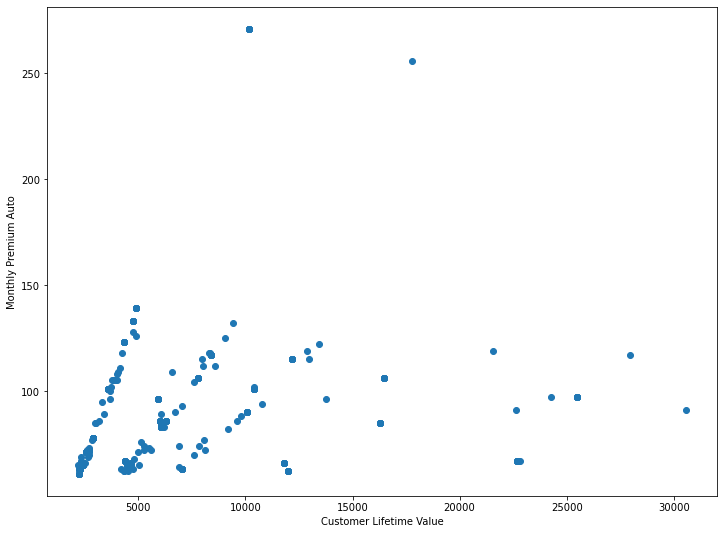

Unemployed


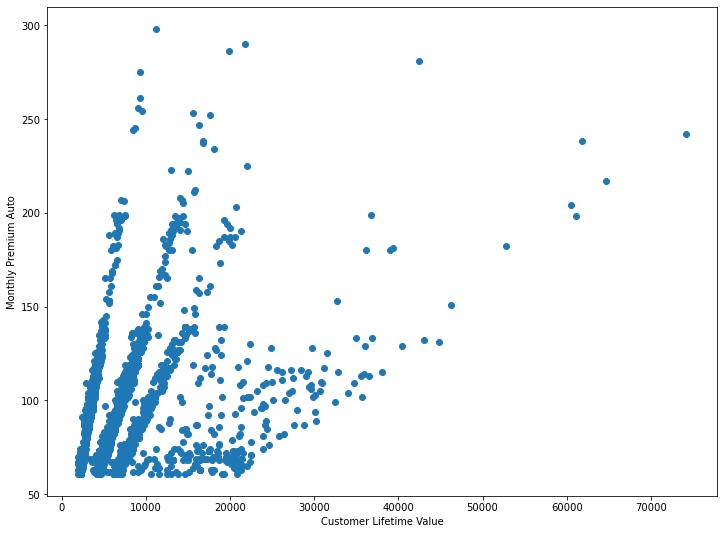

Gender
F


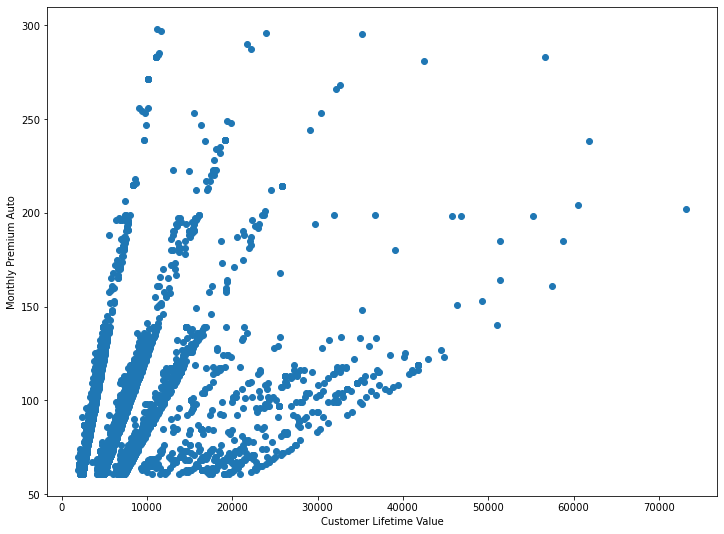

M


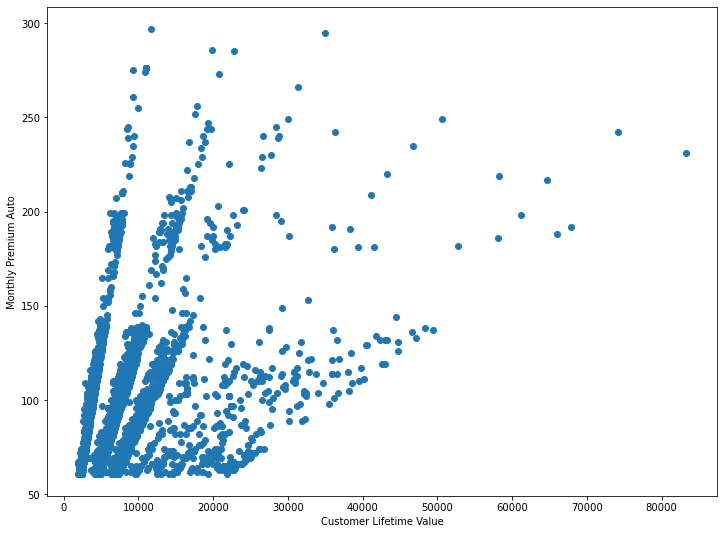

Marital Status
Divorced


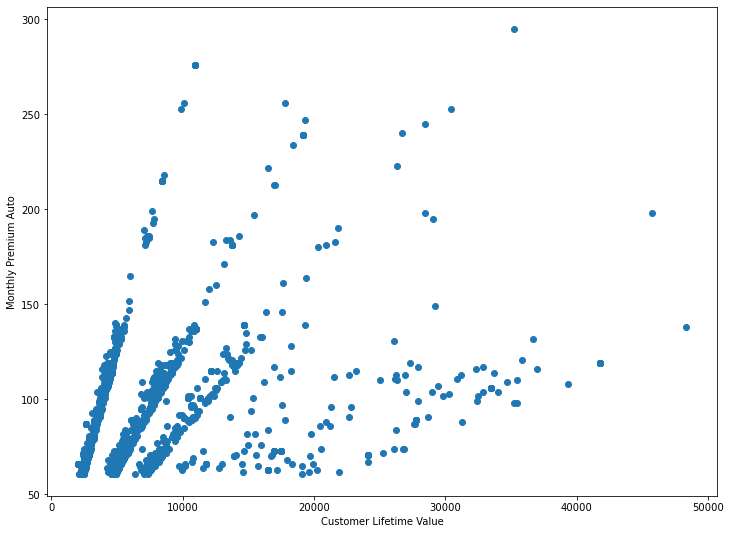

Married


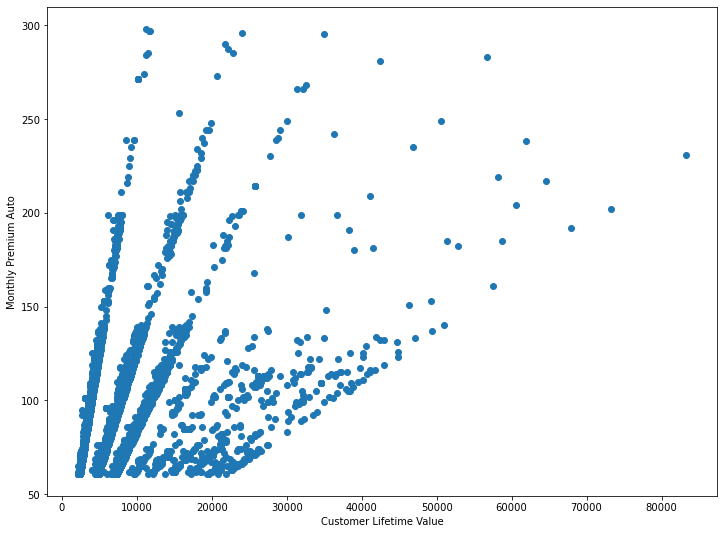

Single


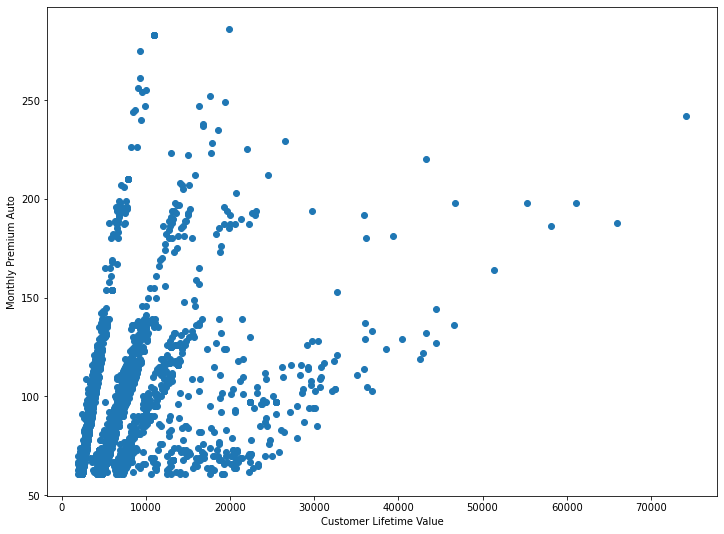

Number of Policies
1


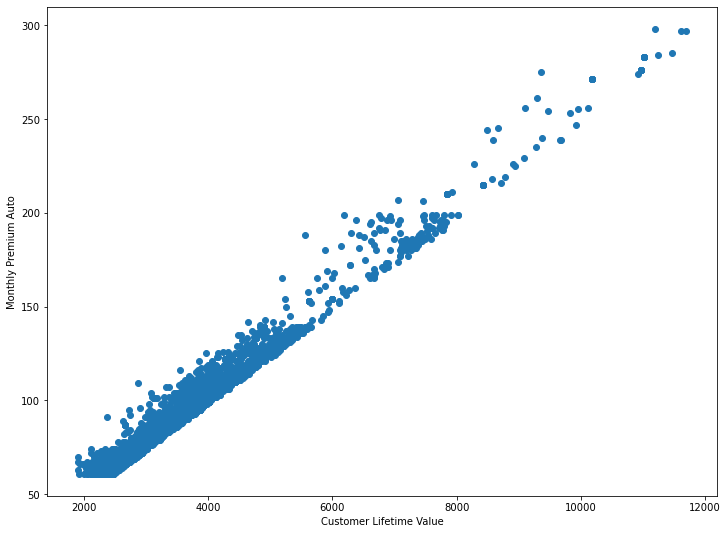

2


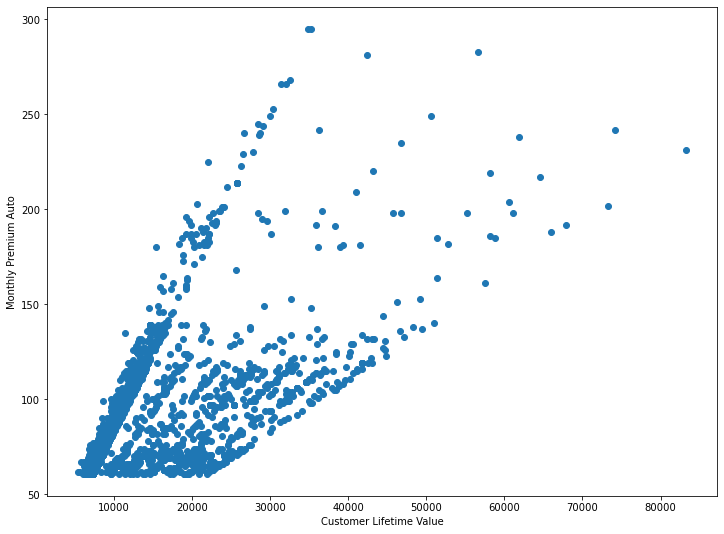

3


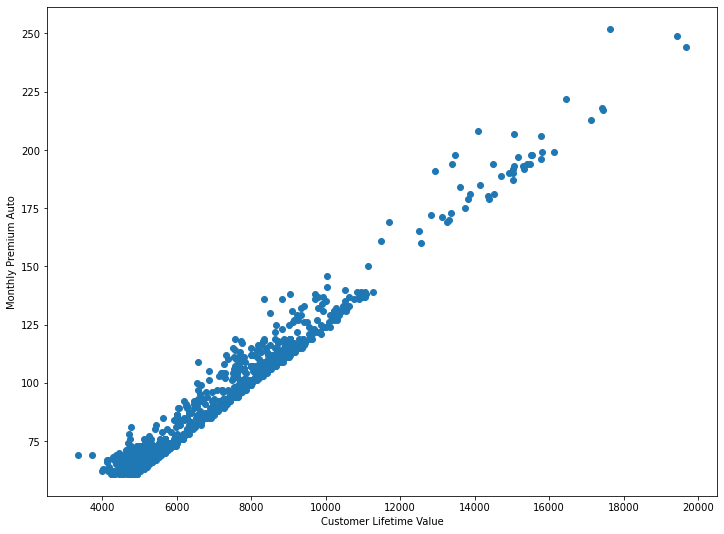

4


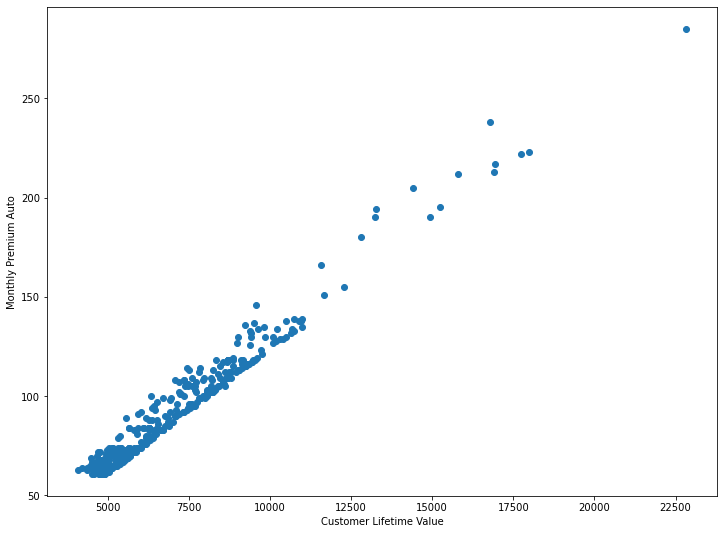

5


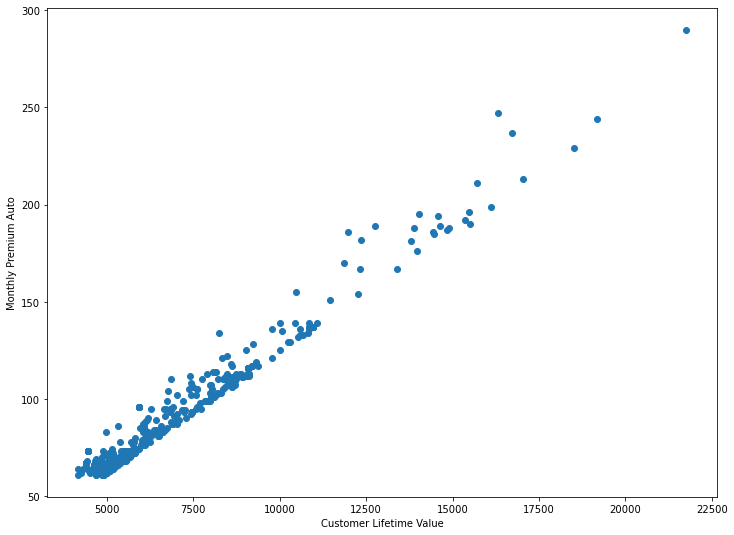

6


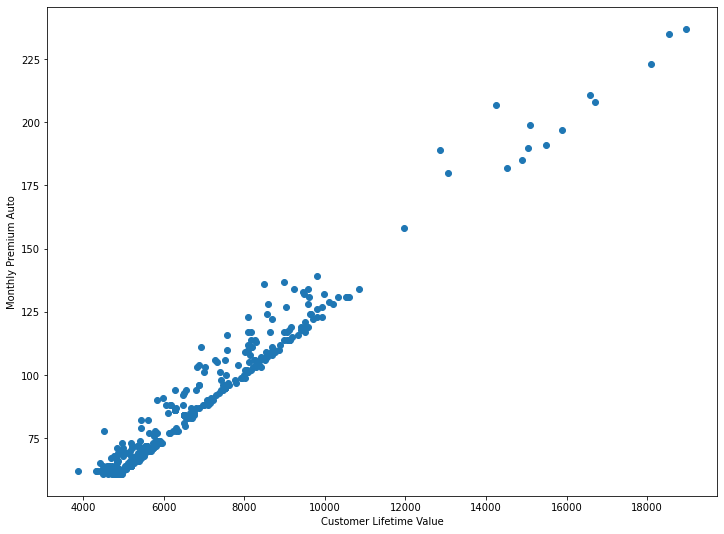

7


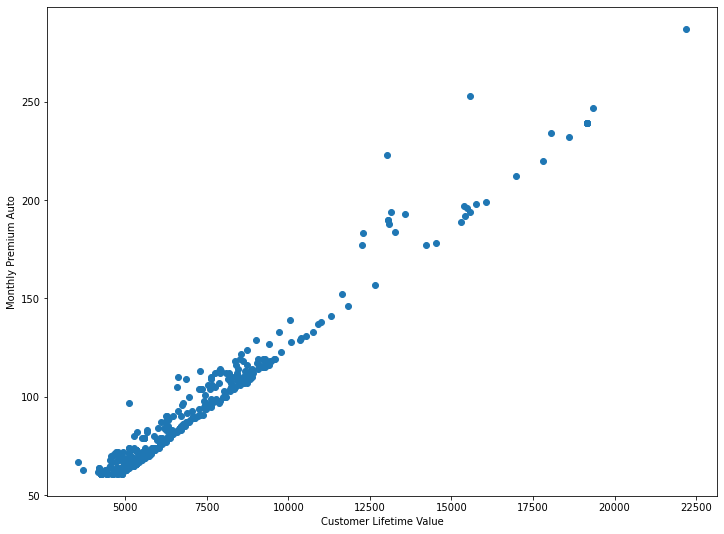

8


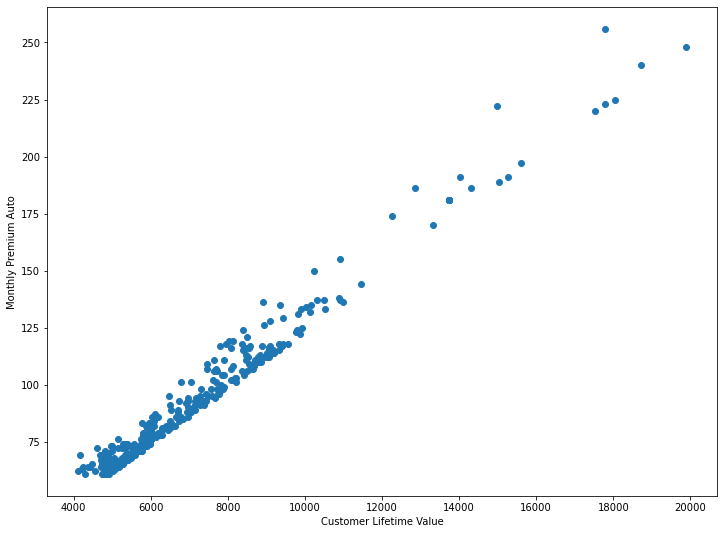

9


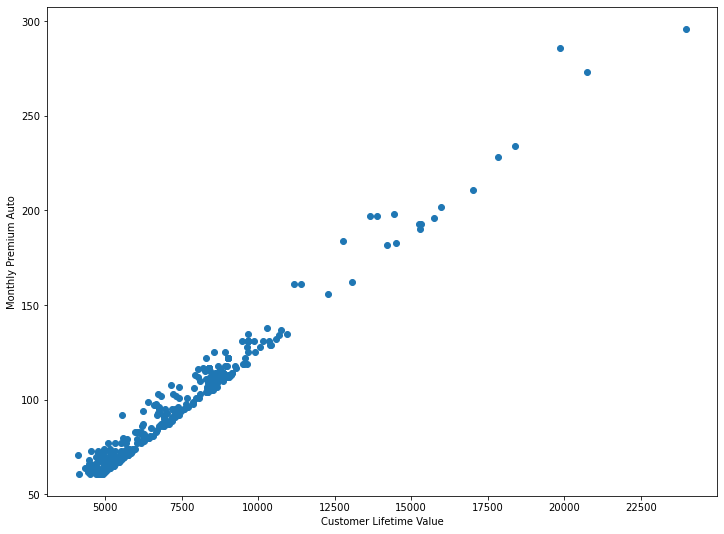

Policy Type
Corporate Auto


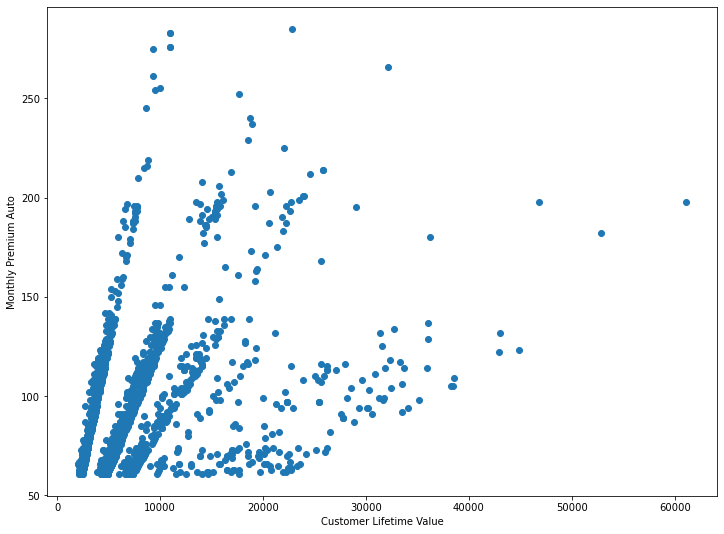

Personal Auto


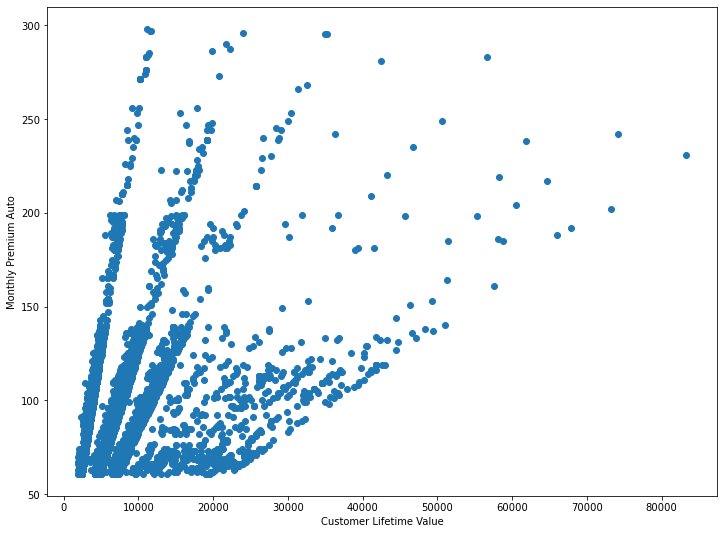

Special Auto


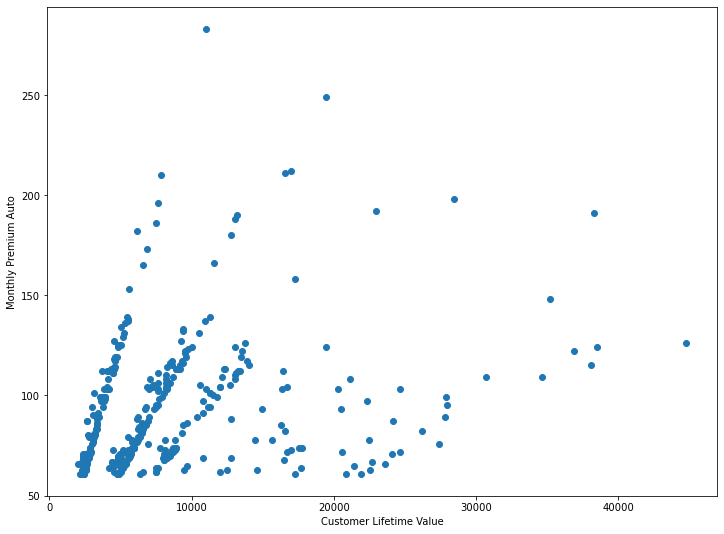

Policy
Corporate L1


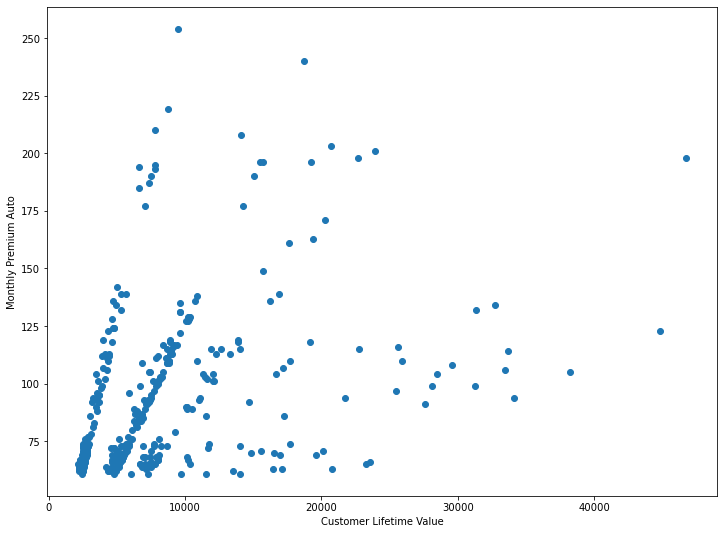

Corporate L2


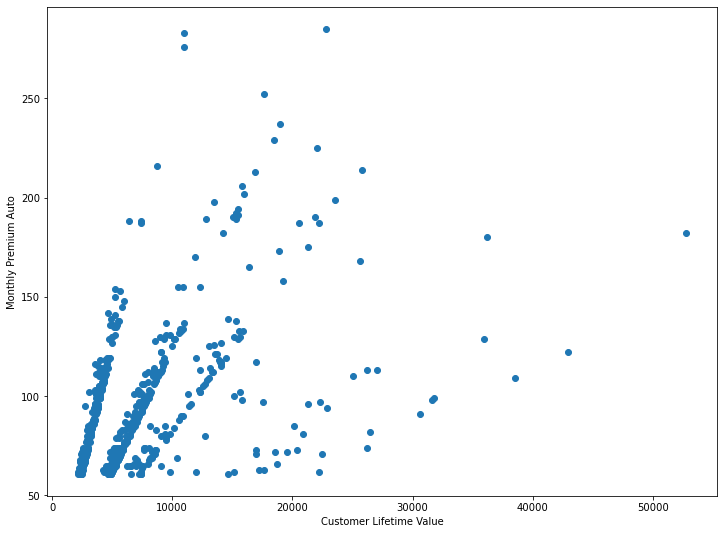

Corporate L3


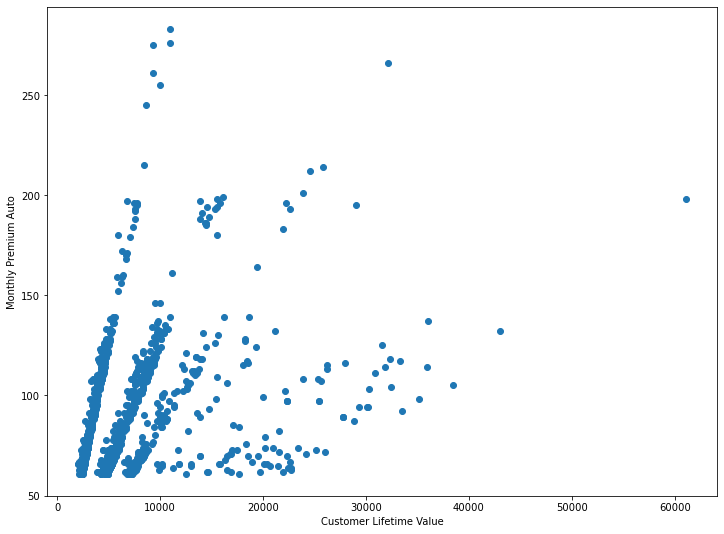

Personal L1


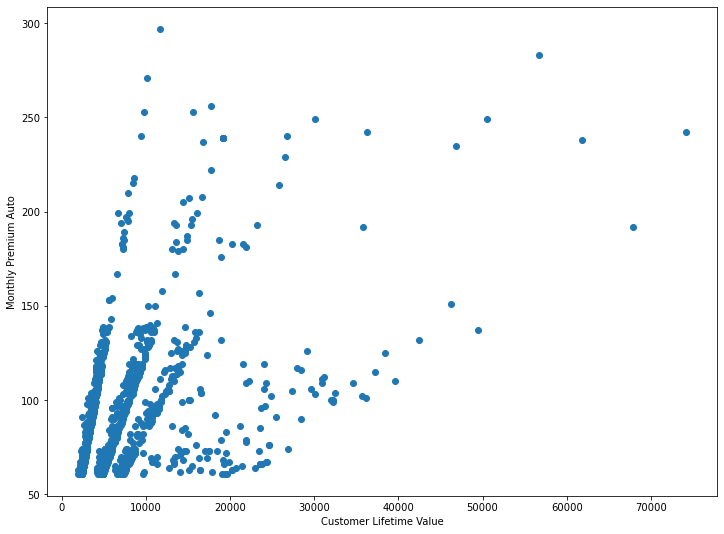

Personal L2


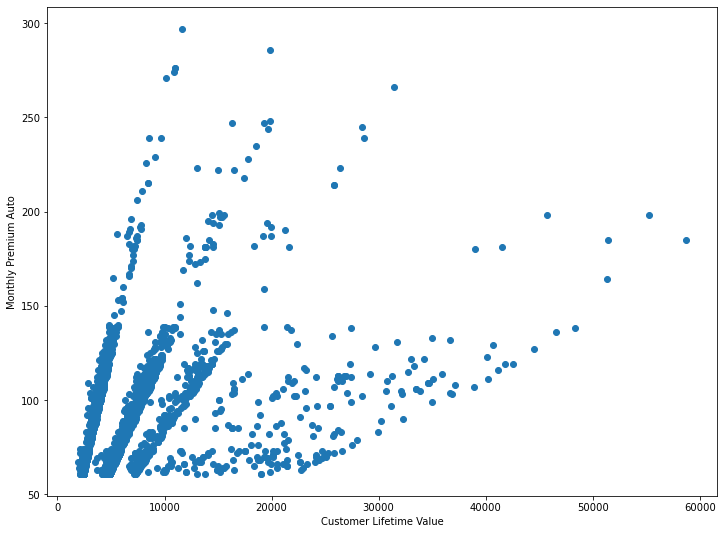

Personal L3


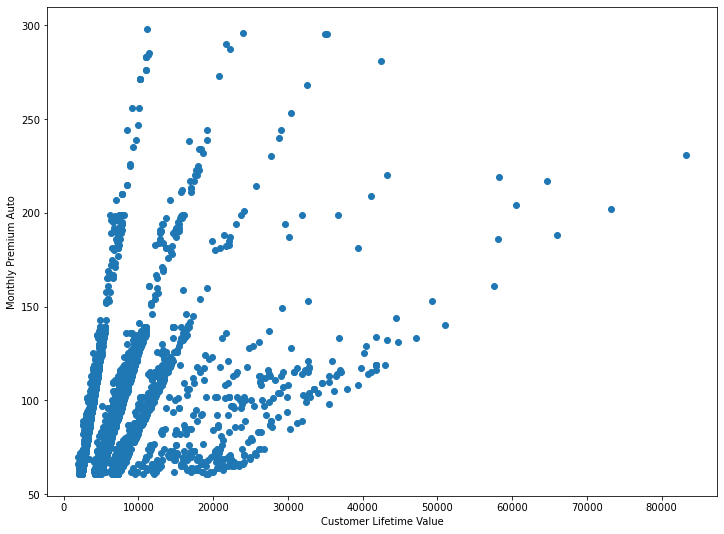

Special L1


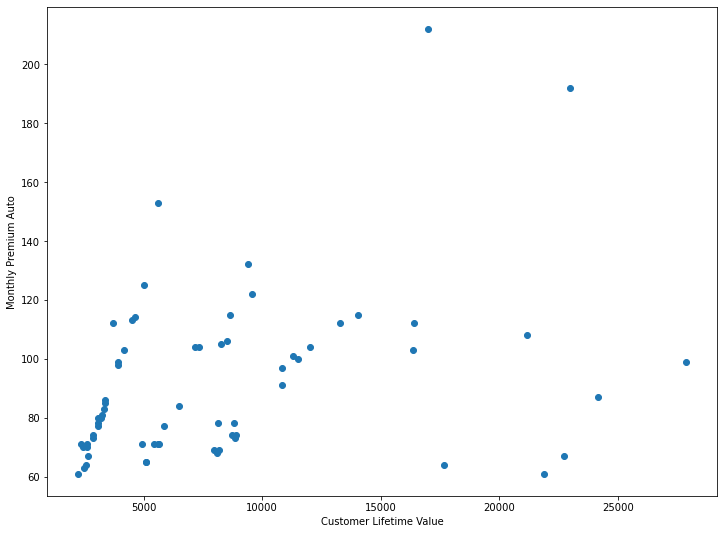

Special L2


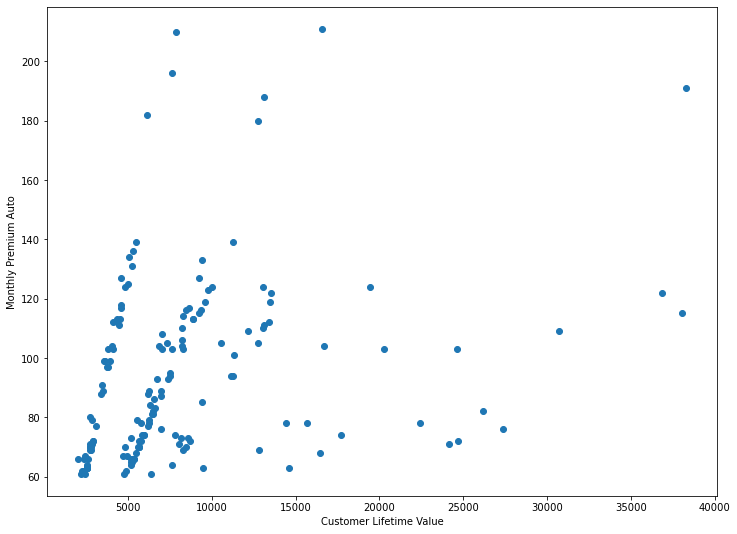

Special L3


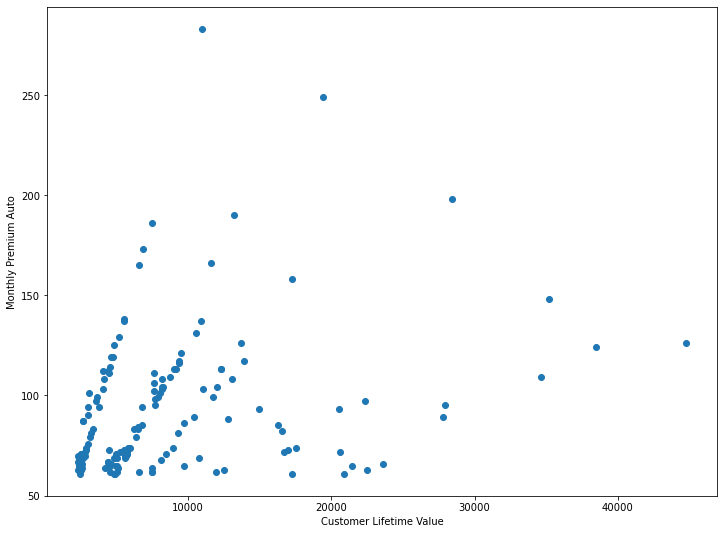

Renew Offer Type
Offer1


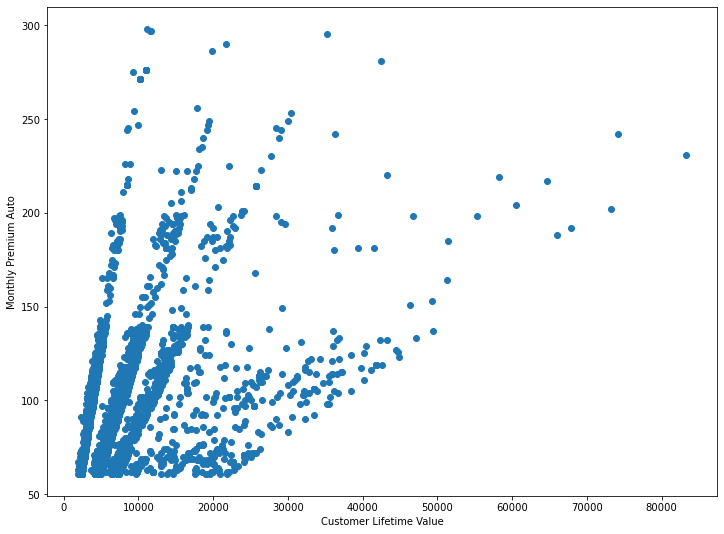

Offer2


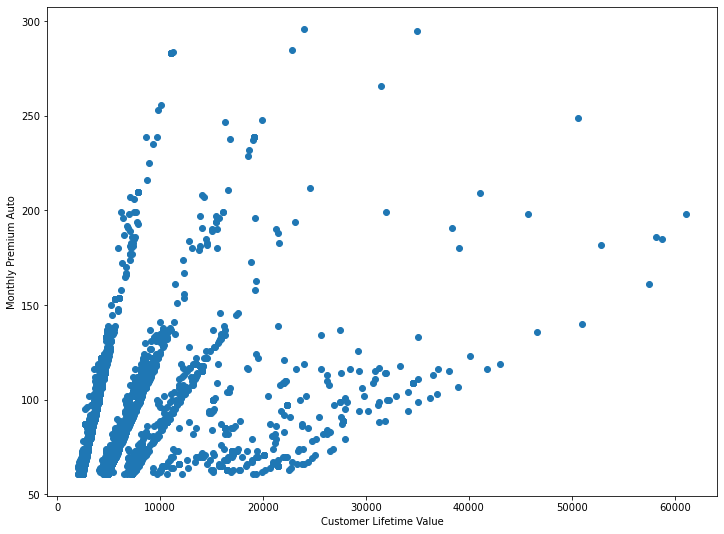

Offer3


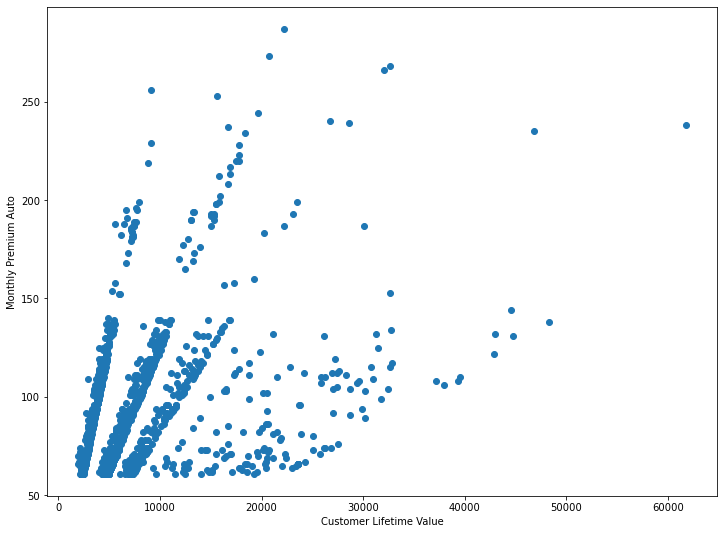

Offer4


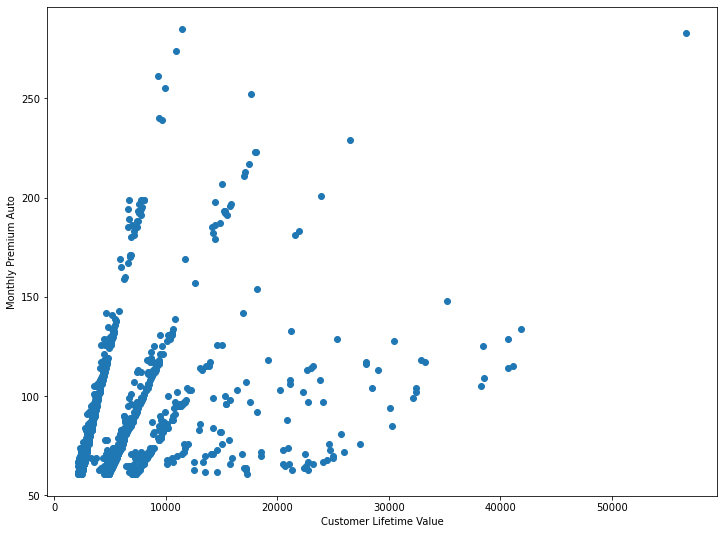

Sales Channel
Agent


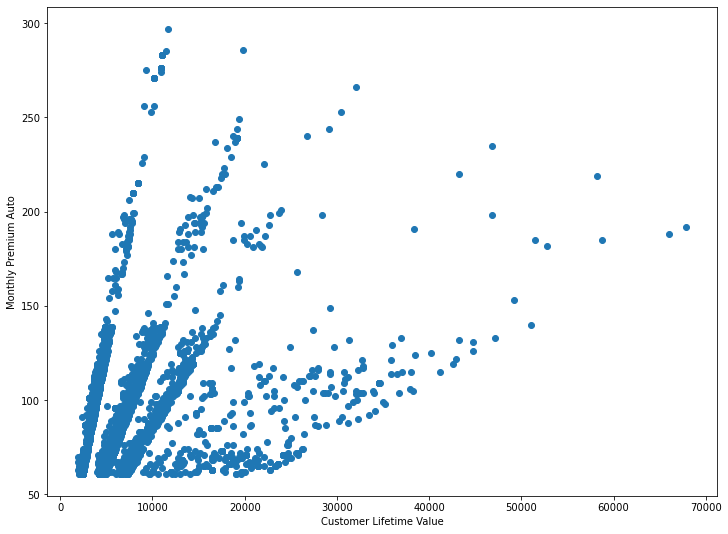

Branch


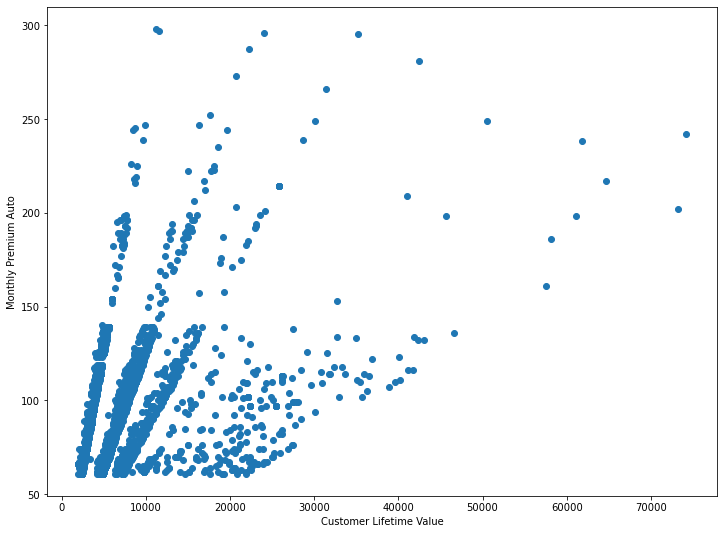

Call Center


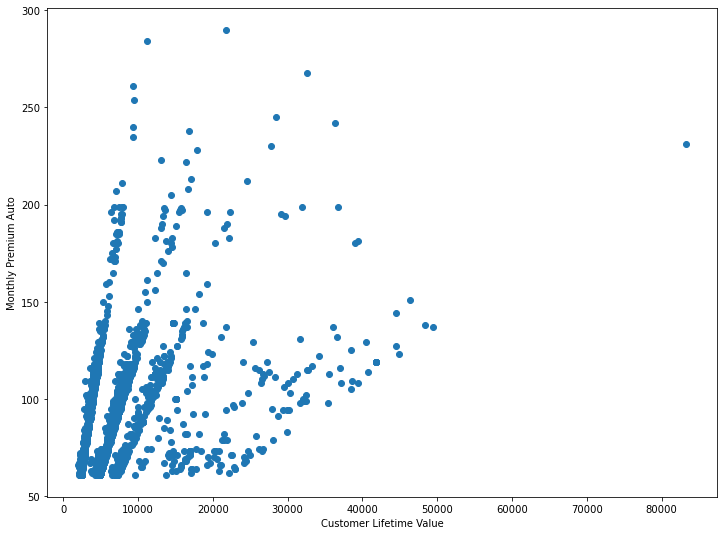

Web


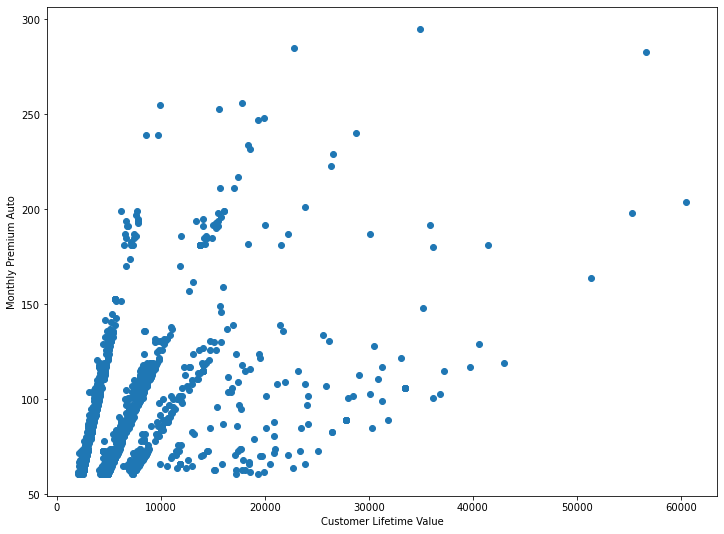

Vehicle Class
Four-Door Car


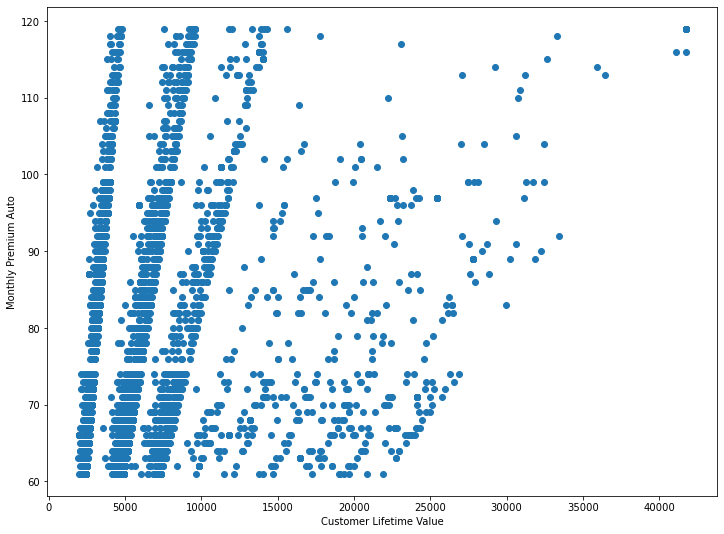

Luxury Car


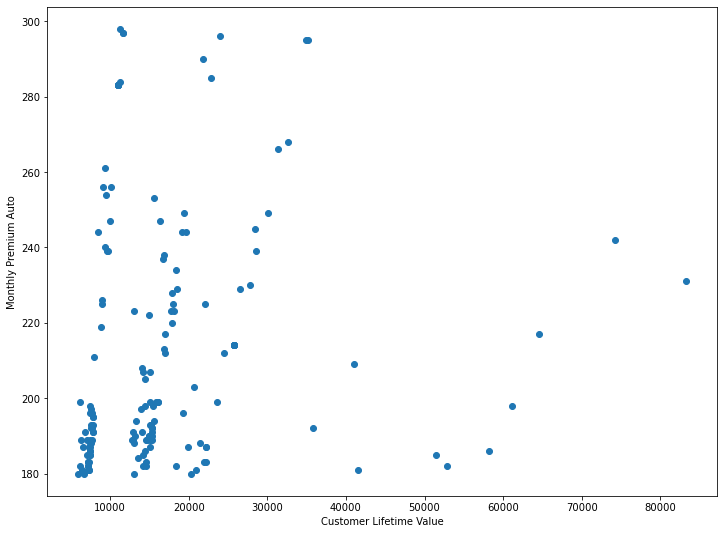

Luxury SUV


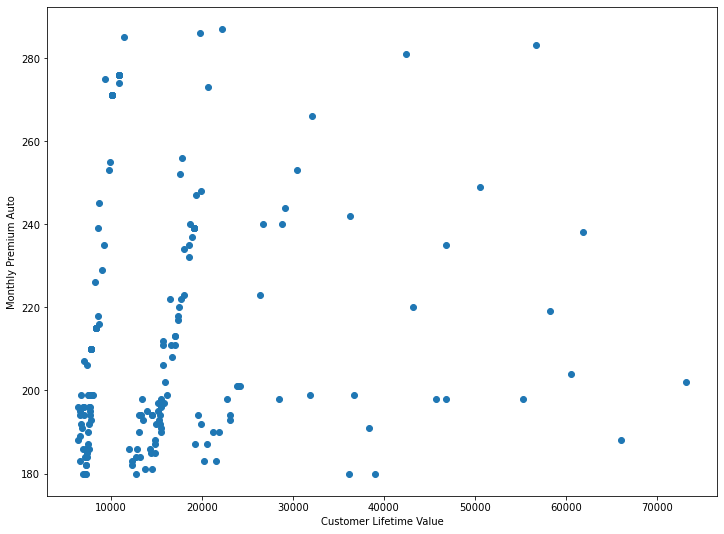

SUV


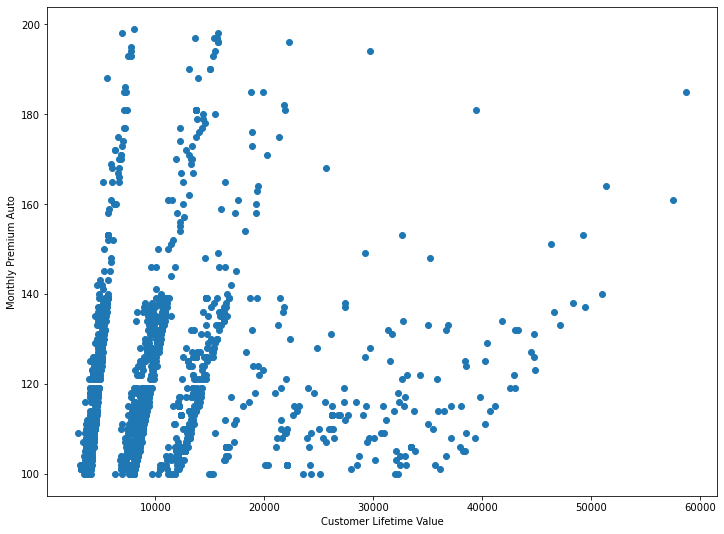

Sports Car


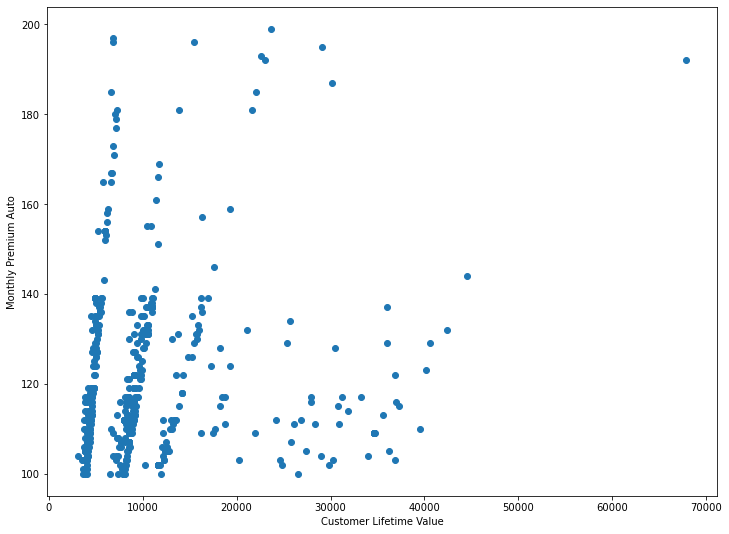

Two-Door Car


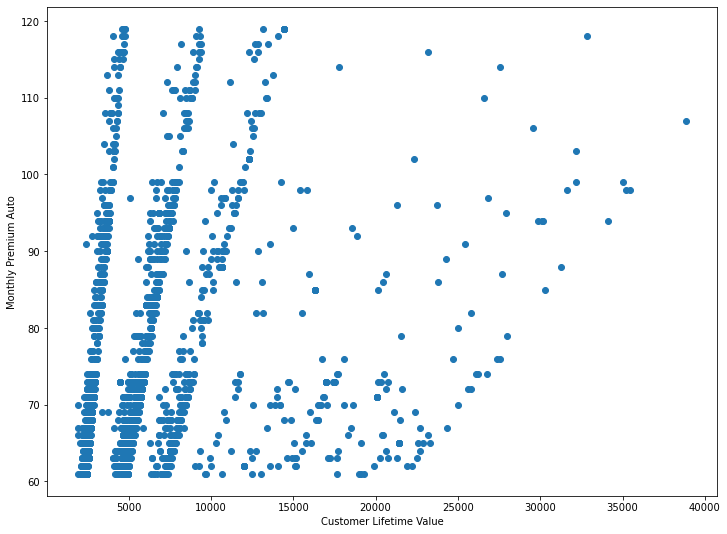

Vehicle Size
Large


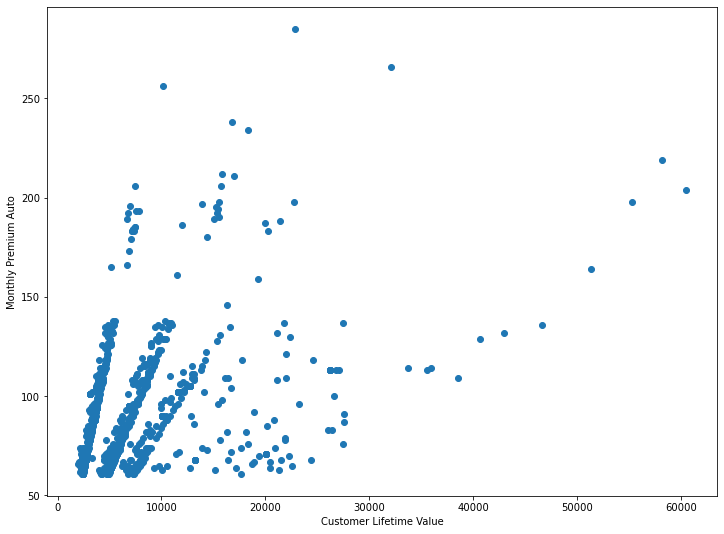

Medsize


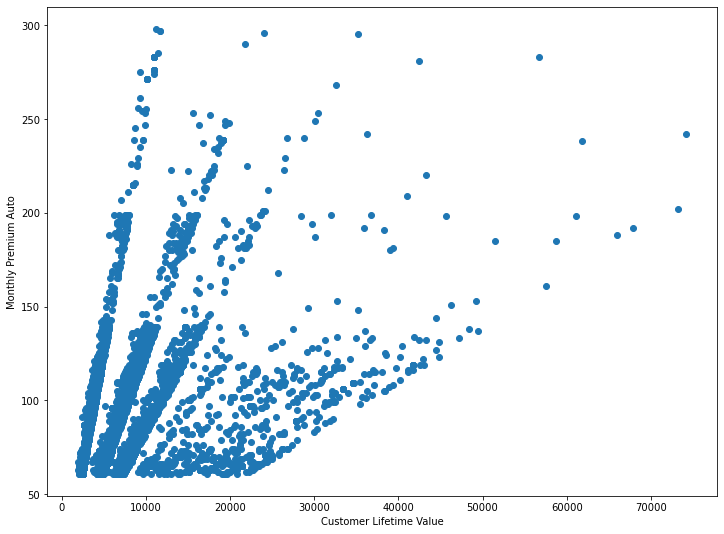

Small


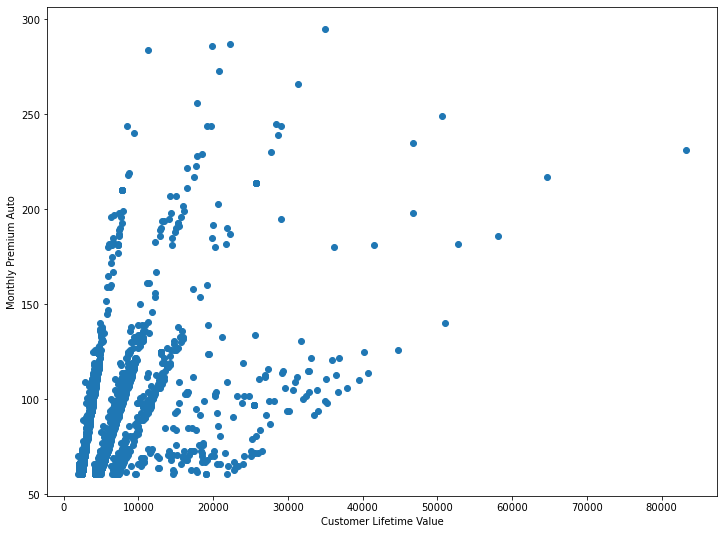

In [11]:
for i in categorical_var:
    cats=df.groupby(i)['Customer'].count()
    indx=cats.index
    print(i)
    for j in indx:
        print(j)
        plt.figure(figsize = (12, 9))
        plt.scatter(df[df[i]==j]['Customer Lifetime Value'], df[df[i]==j]['Monthly Premium Auto'])
        plt.xlabel('Customer Lifetime Value')
        plt.ylabel('Monthly Premium Auto')
        plt.show() 

Number of Policies seemed to separate the lines.

In [12]:
nop=df.groupby('Number of Policies')['Customer'].count()
nop

Number of Policies
1    3251
2    2294
3    1168
4     409
5     407
6     372
7     433
8     384
9     416
Name: Customer, dtype: int64

In [25]:
nopi=nop.index
nopi

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='Number of Policies')

Overlapped Plot

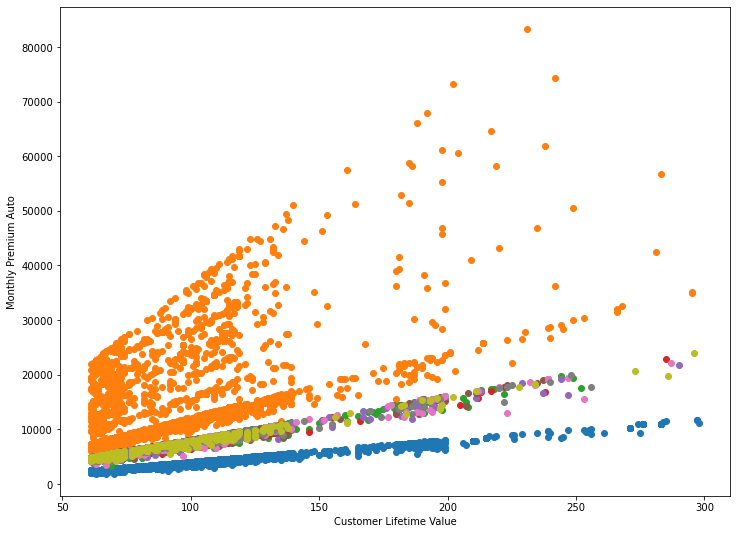

In [14]:
plt.figure(figsize = (12, 9))
for i in nopi:
    plt.scatter(df[df['Number of Policies']==i]['Monthly Premium Auto'], df[df['Number of Policies']==i]['Customer Lifetime Value'])
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Monthly Premium Auto')
plt.show()

In [ ]:
Predicting CLV using Linear Regression

In [15]:
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

Predicting the Whole:

In [16]:
X = df['Monthly Premium Auto'].values.reshape(-1,1)
y = df['Customer Lifetime Value'].values.reshape(-1,1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[432.67220054]
[[81.74976994]]


In [20]:
y_pred = regressor.predict(X_test)

In [21]:
df_ = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_

,Actual,Predicted
0,5592.455266,6155.156097
1,2317.282049,5991.656557
2,9540.923395,10160.894824
3,8581.278701,19970.867217
4,4229.923123,10733.143214
...,...,...
1822,8343.751519,6236.905867
1823,8828.933996,9425.146894
1824,4016.541995,9506.896664
1825,5159.369746,6482.155176


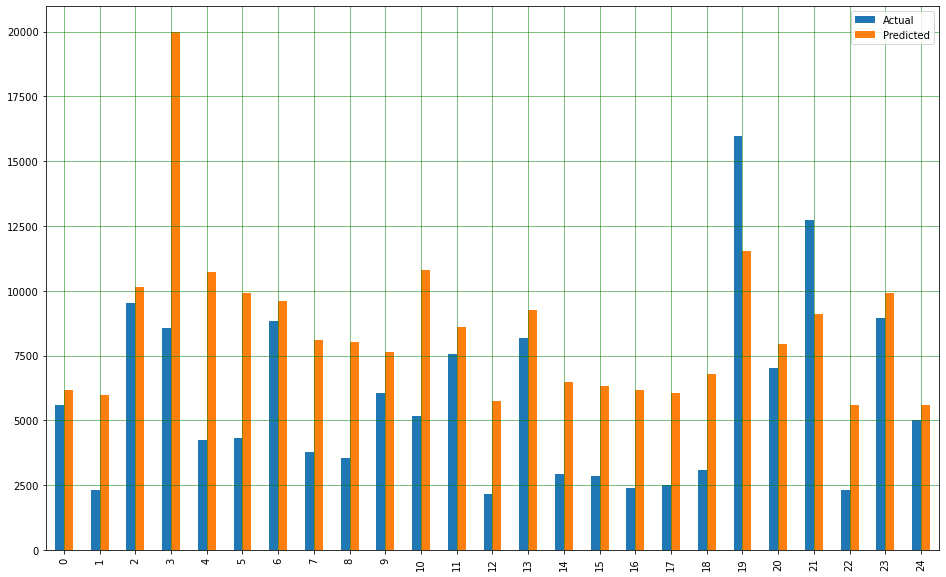

In [22]:
df1 = df_.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

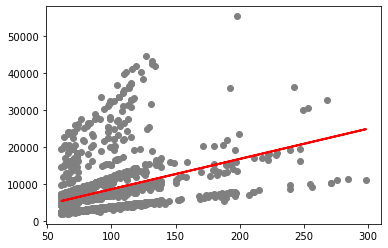

In [23]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [24]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 6123.717820331538


The RMSE is high. It needs to be improvised

1


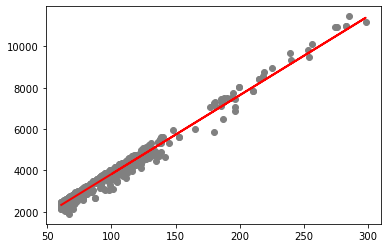

Root Mean Squared Error: 206.45131196713712
2


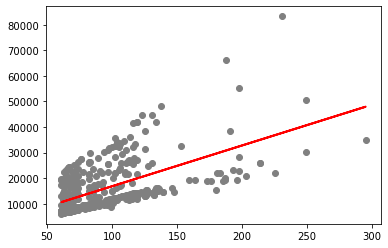

Root Mean Squared Error: 7711.783292616258
3


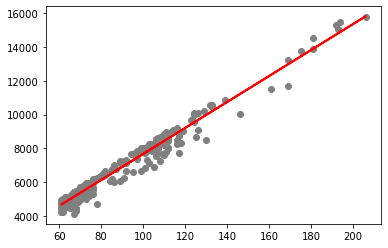

Root Mean Squared Error: 416.1160908753109
4


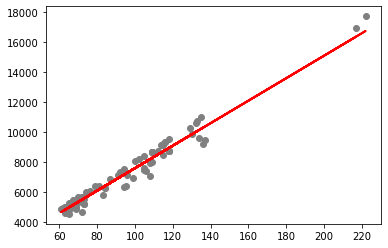

Root Mean Squared Error: 436.0145372188123
5


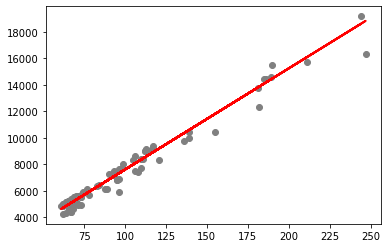

Root Mean Squared Error: 551.5463090409556
6


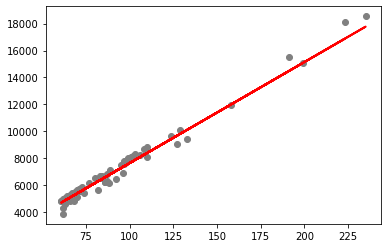

Root Mean Squared Error: 372.4951982838367
7


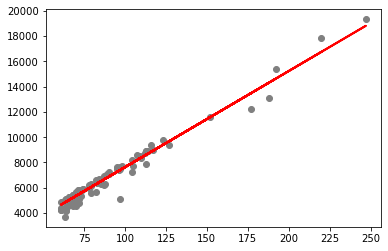

Root Mean Squared Error: 494.6670982785309
8


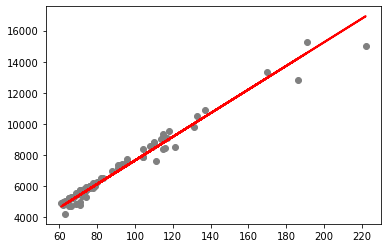

Root Mean Squared Error: 411.8455512748365
9


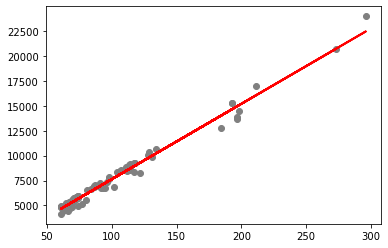

Root Mean Squared Error: 472.96744749573975


In [26]:
#seperately
for i in nopi:
    X = df[df['Number of Policies']==i]['Monthly Premium Auto'].values.reshape(-1,1)
    y = df[df['Number of Policies']==i]['Customer Lifetime Value'].values.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)   
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train) #training the algorithm
    y_pred = regressor.predict(X_test)
    df_ = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
    print(i)
    plt.scatter(X_test, y_test,  color='gray')
    plt.plot(X_test, y_pred, color='red', linewidth=2)
    plt.show()
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    

The rmse values have significantly decreased when The CLV is predicted by taking 'Number of Policies' seperately. 